In [1]:
# Importing useful packages
import numpy as np
from scipy import stats
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import pylab 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from new_var import calc,y1function,y2function,C3function,C6function
from outliers import outlier
from Standardising import standard
from Recoding_SIC_Codes import Industry_Division 
%matplotlib inline
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support


# Read in Data file and define NaN values
ipo_data = pd.read_excel("Competition #1 Raw Data_UPDATED I3.xlsx",header=0,na_values='-' )
ipo_data.I3 = ipo_data.I3.astype(object) # Converting to object for the moment to tidy up summary statistics
# Run Descriptive Statistics on Data File
#print(ipo_data.dtypes)
# Replacing NaN in C2 with 1 
ipo_data['C2']=ipo_data['C2'].fillna(1)


# Removing negative and 0 values for the word/sentence counts as it is beleived that these are errors
# Removing 0 and negatives for T' calculations        
ipo_data['T2']=ipo_data['T2'].mask(ipo_data['T2'] <= 0,ipo_data['T2'].mean())
ipo_data['T1']=ipo_data['T1'].mask(ipo_data['T1'] <= 0,ipo_data['T1'].mean())
ipo_data['T3']=ipo_data['T3'].mask(ipo_data['T3'] <= 0,ipo_data['T3'].mean())
ipo_data['T4']=ipo_data['T4'].mask(ipo_data['T4'] <= 0,ipo_data['T4'].mean())
ipo_data['T5']=ipo_data['T5'].mask(ipo_data['T5'] <= 0,ipo_data['T5'].mean())
ipo_data['S1']=ipo_data['S1'].mask(ipo_data['S1'] <= 0,ipo_data['S1'].mean())
ipo_data['C3']=ipo_data['C3'].mask(ipo_data['C3'] == 0,ipo_data['C3'].mean())
# Replace NaN values with mean
ipo_data=ipo_data.fillna(ipo_data.mean())


C:\Users\conor\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\conor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

# Creating our target and control variables
ipo_data['Y1'] = ipo_data.apply(y1function, axis=1)
ipo_data['Y2'] = ipo_data.apply(y2function, axis=1)
ipo_data['C3x'] = ipo_data.apply(C3function, axis=1)
ipo_data['C6x'] = ipo_data.apply(C6function, axis=1)

#Creating ratios for the words, sentences and postive/negative counts. Ratios provide insight
calc(ipo_data)

#Removing redundent data
# del ipo_data['C3']
# del ipo_data['C5']
# del ipo_data['C6']
# # del ipo_data['T1']
# # del ipo_data['T2']
# del ipo_data['T3']
# del ipo_data['T4']
# del ipo_data['T5']
# del ipo_data['S1']
# del ipo_data['S2']
# del ipo_data['S3']
# del ipo_data['P(1Day)']
# del ipo_data['P(L)']
# del ipo_data['P(H)']
# del ipo_data['P(IPO)']
#Looking at the new description of the data
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,Y2,C3x,C6x,C5x,T3x,T4x,T5x,S1x,S2x,S3x
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.863636,1.802750,0.007282,4.935776e+07,1.241519e+07,...,0.708211,0.536657,0.052708,4.627711,0.918942,0.629876,0.080692,0.005504,0.009179,0.011854
std,6.031467,6.604398,5.792641,72.042293,150.328785,0.343426,158.308525,0.032775,1.039156e+08,2.501761e+07,...,0.454919,0.499020,0.107639,6.245584,0.624282,0.076265,0.744766,0.004784,0.004324,0.008970
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,...,0.000000,0.000000,0.000000,0.283223,0.703925,0.395480,0.031595,0.001389,0.002152,0.005125
25%,10.000000,13.000000,11.000000,11.092500,85.000000,1.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,...,0.000000,0.000000,0.000000,2.853439,0.883578,0.580815,0.047413,0.004154,0.007031,0.009570
50%,13.500000,15.481190,13.000000,15.000000,110.000000,1.000000,0.085000,0.007282,2.759165e+07,7.500000e+06,...,1.000000,1.000000,0.000000,3.770051,0.897133,0.629077,0.051901,0.005069,0.008600,0.011305
75%,17.000000,17.000000,15.000000,21.030001,152.750000,1.000000,0.620000,0.030941,4.938184e+07,1.208721e+07,...,1.000000,1.000000,0.071429,4.865080,0.909732,0.674852,0.056471,0.006258,0.010535,0.012883
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,...,1.000000,1.000000,1.000000,99.787255,17.165085,1.443089,19.500949,0.121442,0.091082,0.233397


In [3]:
ipo_data['income']=ipo_data['P(IPO)']*ipo_data['C6']
ipo_data['perOffered']=ipo_data['C6']/ipo_data['C5']
ipo_data['P/E']=ipo_data['P(IPO)']/ipo_data['C3']
ipo_data['P/E']=ipo_data['P/E']+1150
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,C5x,T3x,T4x,T5x,S1x,S2x,S3x,income,perOffered,P/E
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.863636,1.802750,0.007282,4.935776e+07,1.241519e+07,...,4.627711,0.918942,0.629876,0.080692,0.005504,0.009179,0.011854,2.265801e+08,0.304365,1159.904779
std,6.031467,6.604398,5.792641,72.042293,150.328785,0.343426,158.308525,0.032775,1.039156e+08,2.501761e+07,...,6.245584,0.624282,0.076265,0.744766,0.004784,0.004324,0.008970,9.485423e+08,0.221202,157.354155
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,...,0.283223,0.703925,0.395480,0.031595,0.001389,0.002152,0.005125,1.706250e+06,0.010021,0.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,1.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,...,2.853439,0.883578,0.580815,0.047413,0.004154,0.007031,0.009570,5.810000e+07,0.205547,1139.437996
50%,13.500000,15.481190,13.000000,15.000000,110.000000,1.000000,0.085000,0.007282,2.759165e+07,7.500000e+06,...,3.770051,0.897133,0.629077,0.051901,0.005069,0.008600,0.011305,9.775000e+07,0.265248,1152.913835
75%,17.000000,17.000000,15.000000,21.030001,152.750000,1.000000,0.620000,0.030941,4.938184e+07,1.208721e+07,...,4.865080,0.909732,0.674852,0.056471,0.006258,0.010535,0.012883,1.734750e+08,0.350455,1177.990302
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,...,99.787255,17.165085,1.443089,19.500949,0.121442,0.091082,0.233397,1.786400e+10,3.530786,2950.000000


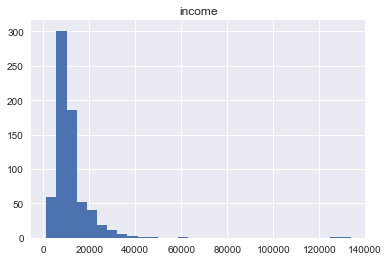

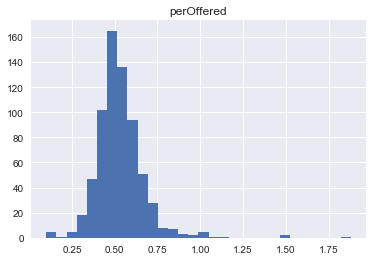

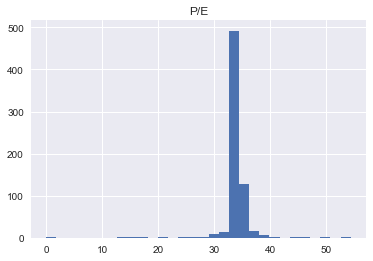

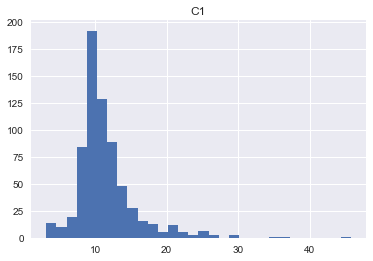

C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


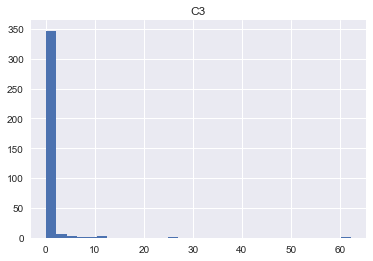

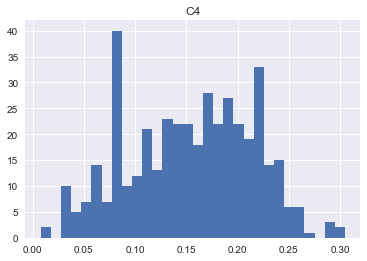

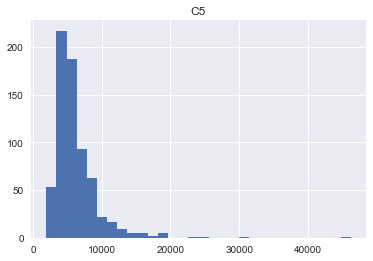

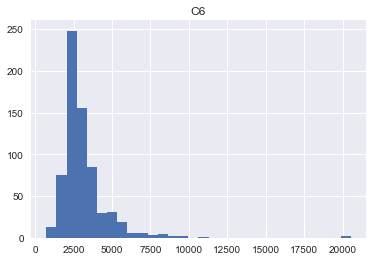

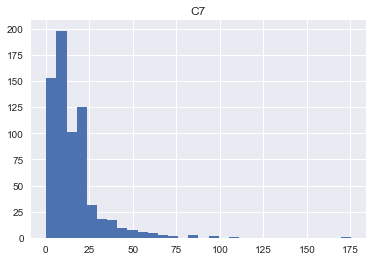

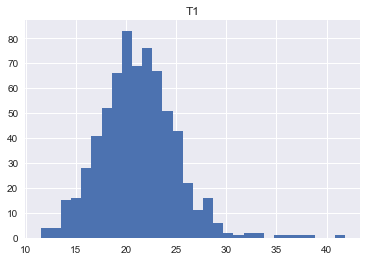

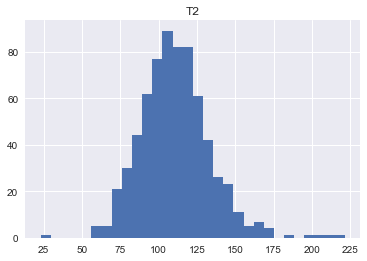

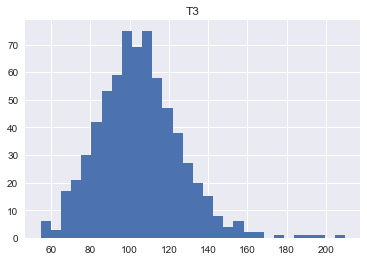

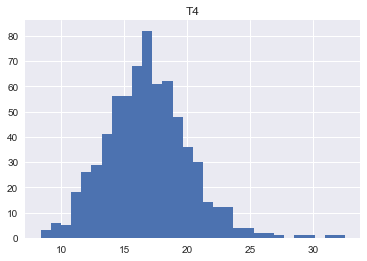

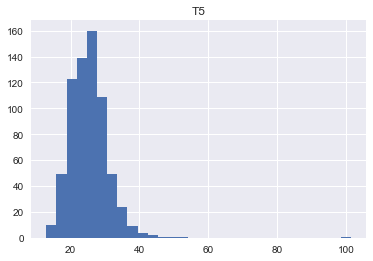

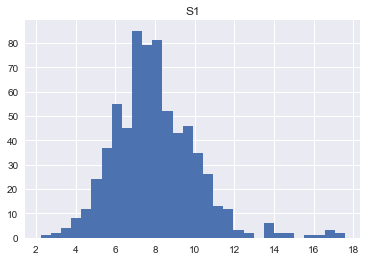

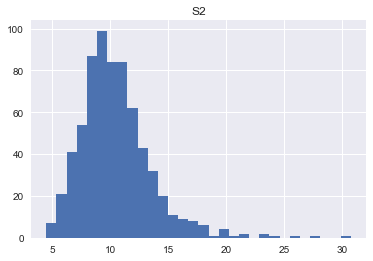

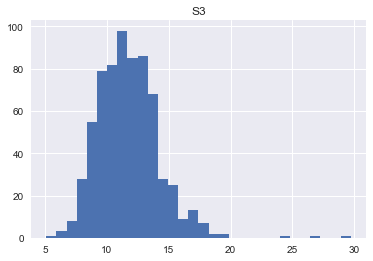

In [4]:
cont_var=['income','perOffered','P/E','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3'] #Variables that need to be normalized
cont_plot=ipo_data[cont_var]

# plotting our variables
for i in range(len(cont_plot.columns)):
        plt.hist(np.sqrt(cont_plot.iloc[:,i]).dropna(),bins=30)
       
        plt.title('%s' % cont_plot.columns[i])
       
        plt.show()

In [5]:
# Converting C6x and C2 to correct type
ipo_data.C6x = ipo_data.C6x.astype(float)

ipo_data.C2 = ipo_data.C2.astype(int)
#Filing days was broken into three seperate groups. Under six month, 6-12 months, and over 12 months. 
ipo_data['C6xbin'] = 0
ipo_data.loc[(ipo_data['C6x'] > 0),'C6xbin'] = 1

sqrt_transform=['income','P/E','perOffered','S1x','S2x','S3x'] #Variables that need to be square rooted
ipo_data[sqrt_transform]=ipo_data[sqrt_transform]**0.5 #square rooting variable

log_transform=['C1','C7'] #Variables to be log transformed
ipo_data[log_transform]=np.log(ipo_data[log_transform])#log transformation

ipo_data['T5xbin'] = 0
# ipo_data.loc[(ipo_data['T5x'] >= 0.080692),'T5xbin'] = 1
ipo_data.loc[(ipo_data['T5x'] >= 0) & (ipo_data['T5x'] < .0474),'T5xbin'] = 1
ipo_data.loc[(ipo_data['T5x'] >= .047401) & (ipo_data['T5x'] < .0519), 'T5xbin'] = 2
ipo_data.loc[(ipo_data['T5x'] >= .051901) & (ipo_data['T5x'] < .05647), 'T5xbin'] = 3
ipo_data.loc[ipo_data[ 'T5x'] >= .0564701,'T5xbin'] = 4

ipo_data['T3xbin'] = 0
# ipo_data.loc[(ipo_data['T3x'] < 0.897133),'T3xbin'] = 0
# ipo_data.loc[(ipo_data['T3x'] >= 0.897133),'T3xbin'] = 1
ipo_data.loc[(ipo_data['T3x'] >= 0.703925) & (ipo_data['T3x'] < 0.883578),'T3xbin'] = 1
ipo_data.loc[(ipo_data['T3x'] >= .883578) & (ipo_data['T3x'] < 0.897133), 'T3xbin'] = 2
ipo_data.loc[(ipo_data['T3x'] >= .897133) & (ipo_data['T3x'] < 0.909732), 'T3xbin'] = 3
ipo_data.loc[ipo_data[ 'T3x'] >= 0.909732,'T3xbin'] = 4

print(ipo_data.dtypes) # checking the types
print(ipo_data.T5xbin.value_counts())

I1             object
I2             object
I3             object
P(IPO)        float64
P(H)          float64
P(L)          float64
P(1Day)       float64
C1            float64
C2              int32
C3            float64
C4            float64
C5            float64
C6            float64
C7            float64
T1            float64
T2            float64
T3            float64
T4            float64
T5            float64
S1            float64
S2            float64
S3            float64
Y1              int64
Y2              int64
C3x             int64
C6x           float64
C5x           float64
T3x           float64
T4x           float64
T5x           float64
S1x           float64
S2x           float64
S3x           float64
income        float64
perOffered    float64
P/E           float64
C6xbin          int64
T5xbin          int64
T3xbin          int64
dtype: object
4    171
2    171
3    170
1    170
Name: T5xbin, dtype: int64


In [6]:
"""Code to recode the column I3 into industry level.

    Version Control:
    Initial coding
    ------------------------------------------
    Date 8-Feb-18, Author: Danielle Ezzo, Desc: Initial Coding
    """

def Industry_Division1(row,method):
    # Recoding based on table in milestone report
    if method==1:
        if (row['I3']> 99 and row['I3']< 1000):
            return 'Agriculture, Forestry and Fishing'
        elif (row['I3']> 999 and row['I3']< 1500):
            return  'Mining'
        elif (row['I3']> 1499 and row['I3']< 1800):
            return 'Construction'
        elif (row['I3']> 1999 and row['I3']< 4000):
            return 'Manufacturing'
        elif (row['I3']> 3999 and row['I3']< 5000):
            return 'Transportation, Communications, Electric, Gas and Sanitary service'
        elif (row['I3']> 4999 and row['I3']< 5200):
            return 'Wholesale Trade'
        elif (row['I3']> 5199 and row['I3']< 6000):
            return 'Retail Trade'
        elif (row['I3']> 5999 and row['I3']< 6800):
            return 'Finance, Insurance and Real Estate'
        elif (row['I3']> 6999 and row['I3']< 9000):
            return 'Services'
        elif (row['I3']> 9099 and row['I3']< 9730):
            return 'Public Administration'
        elif (row['I3']> 9899 and row['I3']< 10000):
            return 'Nonclassifiable'
        else:
            return 'Missing'
    elif method==2:
        if (row['I3']> 1999 and row['I3']< 4000):
            return 'Manufacturing'
        else:
            return 'Other'
    elif method==3:
        if (row['I3']> 7369 and row['I3']< 7375) :
            return 'Tech'
        else:
            return 'NonTech'
    elif method==4:
        if (row['I3']> 1999 and row['I3']< 4000):
            return 'Manufacturing' # Manufacturing
        elif (row['I3']> 3999 and row['I3']< 5000):
            return 'Services' # Tech Comms etc Services
        elif (row['I3']> 6999 and row['I3']< 9000):
            return 'Services' #Services (combining with above)
        else:
            return 'Other' # All Other
    elif method==5:
        if(row['I3']> 1999 and row['I3']< 4000):
            return 'Manufacturing'
        elif (row['I3']> 3999 and row['I3']< 5000):
            return 'Services' #TCEGS
        elif (row['I3']> 4999 and row['I3']< 5200):
            return 'Trade' #wholesale
        elif (row['I3']> 5199 and row['I3']< 6000):
            return 'Trade' #retail
        elif (row['I3']> 6999 and row['I3']< 9000):
            return 'Services'
        else:
            return 'Other'
    elif method==6:
        if(row['I3']> 1999 and row['I3']< 4000):
            return 'Manufacturing'
        elif (row['I3']> 3999 and row['I3']< 5000):
            return 'TCEGS' 
        elif (row['I3']> 4999 and row['I3']< 5200):
            return 'Trade' #wholesale
        elif (row['I3']> 5199 and row['I3']< 6000):
            return 'Trade' #retail
        elif (row['I3']> 6999 and row['I3']< 9000):
            return 'Services'
        else:
            return 'Other'
    elif method==7:
        if (row['I3']> 99 and row['I3']< 5000):
            return 'Manual Labor'
        else: 
            return 'NonManual Labor'
        

In [7]:

ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T5x,S1x,S2x,S3x,income,perOffered,P/E,C6xbin,T5xbin,T3xbin
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,4.765815,0.863636,1.802750,0.007282,4.935776e+07,1.241519e+07,...,0.080692,0.072485,0.094300,0.107151,11921.223483,0.531898,33.955667,0.373900,2.501466,2.500000
std,6.031467,6.604398,5.792641,72.042293,0.660942,0.343426,158.308525,0.032775,1.039156e+08,2.501761e+07,...,0.744766,0.015820,0.016951,0.019313,9197.201900,0.146563,2.632033,0.484193,1.118854,1.120166
min,3.000000,0.000000,3.000000,0.000000,2.302585,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,...,0.031595,0.037268,0.046394,0.071590,1306.235048,0.100107,0.000000,0.000000,1.000000,1.000000
25%,10.000000,13.000000,11.000000,11.092500,4.442651,1.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,...,0.047413,0.064454,0.083854,0.097826,7622.335600,0.453372,33.755562,0.000000,2.000000,1.250000
50%,13.500000,15.481190,13.000000,15.000000,4.700480,1.000000,0.085000,0.007282,2.759165e+07,7.500000e+06,...,0.051901,0.071197,0.092735,0.106324,9886.851883,0.515023,33.954585,0.000000,2.500000,2.500000
75%,17.000000,17.000000,15.000000,21.030001,5.028799,1.000000,0.620000,0.030941,4.938184e+07,1.208721e+07,...,0.056471,0.079108,0.102638,0.113504,13170.989928,0.591992,34.321863,1.000000,3.750000,3.750000
max,85.000000,135.000000,108.000000,1159.200562,7.643483,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,...,19.500949,0.348485,0.301797,0.483111,133656.275573,1.879039,54.313902,1.000000,4.000000,4.000000


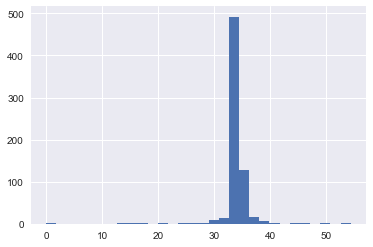

In [8]:

plt.hist(ipo_data['P/E'],bins=30)



plt.show()

In [9]:
# Add the new data to the end of the table
ipo_data.I3 = ipo_data.I3.astype(int) # recoding to correct type

# import functools
# import operator


# applying our function to recode our industry codes to sector level
ipo_data['IndDivision'] = ipo_data.apply(Industry_Division1,method=4, axis=1) 
print(ipo_data.head(5))

     I1                           I2    I3  P(IPO)  P(H)  P(L)    P(1Day)  \
0    RA         RAILAMERICA INC /DE   4011    15.0  18.0  16.0  13.750000   
1     G                 Genpact LTD   8742    14.0  18.0  16.0  16.750000   
2  HURN  Huron Consulting Group Inc.  8742    15.0  16.0  14.0  18.900000   
3  ICFI     ICF International, Inc.   8742    12.0  16.0  14.0  12.250000   
4  SRVY       GREENFIELD ONLINE INC   8742    13.0  15.0  13.0  18.700001   

         C1  C2    C3     ...            S1x       S2x       S3x  \
0  4.343805   1  0.30     ...       0.082570  0.122955  0.081668   
1  4.418841   1  0.19     ...       0.077702  0.086114  0.109887   
2  5.030438   1 -0.14     ...       0.055644  0.070385  0.090297   
3  4.941642   1  0.22     ...       0.075398  0.081162  0.126022   
4  4.553877   1  0.07     ...       0.081974  0.095998  0.109543   

         income  perOffered        P/E  C6xbin  T5xbin  T3xbin  IndDivision  
0  18165.902125    0.636244  34.641016       0    

In [10]:
dummies = pd.get_dummies(ipo_data['IndDivision'])

ipo_data = ipo_data.join(dummies)
ipo_data.head(5)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,income,perOffered,P/E,C6xbin,T5xbin,T3xbin,IndDivision,Manufacturing,Other,Services
0,RA,RAILAMERICA INC /DE,4011,15.0,18.0,16.0,13.750000,4.343805,1,0.30,...,18165.902125,0.636244,34.641016,0,1,1,Services,0,0,1
1,G,Genpact LTD,8742,14.0,18.0,16.0,16.750000,4.418841,1,0.19,...,22228.757320,0.413510,34.981198,0,2,3,Services,0,0,1
2,HURN,Huron Consulting Group Inc.,8742,15.0,16.0,14.0,18.900000,5.030438,1,-0.14,...,8660.254038,0.554087,32.293299,0,3,1,Services,0,0,1
3,ICFI,"ICF International, Inc.",8742,12.0,16.0,14.0,12.250000,4.941642,1,0.22,...,7485.986909,0.600604,34.706562,0,2,3,Services,0,0,1
4,SRVY,GREENFIELD ONLINE INC,8742,13.0,15.0,13.0,18.700001,4.553877,1,0.07,...,8062.257748,0.551091,36.547425,0,2,3,Services,0,0,1


In [20]:
corr=['C1','C4','C6x','C7','T3x','T4x','T5x','S1x','S2x','S3x','T1','P/E','income','perOffered','T2','Y1','Y2','T3xbin','T5xbin','C6xbin','C3x','C5x']
ipo_data[corr].corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,C1,C4,C6x,C7,T3x,T4x,T5x,S1x,S2x,S3x,T1,P/E,income,perOffered,T2,Y1,Y2,T3xbin,T5xbin,C6xbin,C3x,C5x
C1,1.0,0.091,-0.064,0.053,-0.058,0.055,0.031,0.033,0.048,-0.026,0.13,-0.013,-0.047,-0.023,0.13,0.07,0.0048,-0.065,0.036,-0.087,0.037,0.023
C4,0.091,1.0,0.093,0.018,0.057,0.085,0.062,0.0012,0.0041,0.039,0.003,-0.043,0.0058,0.046,0.019,-0.071,0.1,0.051,0.055,0.073,-0.013,-0.046
C6x,-0.064,0.093,1.0,-0.054,-0.039,-0.024,-0.098,-0.081,-0.12,-0.045,0.07,0.093,0.28,-0.13,0.055,-0.77,0.24,-0.035,-0.1,0.96,0.11,0.13
C7,0.053,0.018,-0.054,1.0,-0.12,0.1,-0.11,0.087,0.19,-0.07,0.26,0.21,0.5,0.034,0.26,0.003,-0.054,-0.12,-0.12,-0.034,0.28,-0.034
T3x,-0.058,0.057,-0.039,-0.12,1.0,-0.11,0.45,0.19,0.074,0.37,-0.049,-0.12,-0.097,-0.091,-0.11,0.11,-0.016,0.97,0.42,-0.08,-0.13,0.091
T4x,0.055,0.085,-0.024,0.1,-0.11,1.0,-0.086,0.071,-0.024,-0.091,0.2,0.016,0.13,-0.11,0.44,0.073,-0.01,-0.099,-0.081,-0.053,0.058,0.11
T5x,0.031,0.062,-0.098,-0.11,0.45,-0.086,1.0,0.18,0.16,0.41,-0.049,-0.12,-0.066,-0.11,-0.077,0.12,-0.018,0.44,0.97,-0.11,-0.24,0.11
S1x,0.033,0.0012,-0.081,0.087,0.19,0.071,0.18,1.0,0.13,0.2,-0.0029,0.087,0.052,0.012,-0.0025,0.11,-0.042,0.19,0.15,-0.074,0.063,-0.012
S2x,0.048,0.0041,-0.12,0.19,0.074,-0.024,0.16,0.13,1.0,0.14,0.18,-0.07,0.16,0.071,0.14,0.18,-0.1,0.062,0.14,-0.12,-0.055,-0.071
S3x,-0.026,0.039,-0.045,-0.07,0.37,-0.091,0.41,0.2,0.14,1.0,-0.22,-0.052,-0.12,-0.058,-0.22,0.062,0.046,0.37,0.37,-0.038,-0.11,0.058


In [12]:
for i in (['C1','C4','C6x','C7','T3x','T4x','T5x','S1x','S2x','S3x','T1','P/E','income','perOffered','T2']):
    grps = pd.unique(ipo_data.T5xbin.values)
    d_data = {grp:ipo_data[i][ipo_data.T5xbin == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data[1], d_data[2],d_data[3],d_data[4])
    print('T5xbin v Variable {} Result {}'.format(i,anova))

T5xbin v Variable C1 Result F_onewayResult(statistic=3.4226178824382321, pvalue=0.016952951985385246)
T5xbin v Variable C4 Result F_onewayResult(statistic=1.5011151116921551, pvalue=0.21302631170079697)
T5xbin v Variable C6x Result F_onewayResult(statistic=1.1086438946285075, pvalue=0.34483486565634391)
T5xbin v Variable C7 Result F_onewayResult(statistic=5.0912867129796044, pvalue=0.0017205846146640075)
T5xbin v Variable T3x Result F_onewayResult(statistic=1.5350453205518722, pvalue=0.20414791758436959)
T5xbin v Variable T4x Result F_onewayResult(statistic=1.3210449114113771, pvalue=0.2664185622307832)
T5xbin v Variable T5x Result F_onewayResult(statistic=1.2244786770129188, pvalue=0.29983523925615335)
T5xbin v Variable S1x Result F_onewayResult(statistic=9.7958262540703043, pvalue=2.4794524068946706e-06)
T5xbin v Variable S2x Result F_onewayResult(statistic=5.0084500006630988, pvalue=0.001929173799471005)
T5xbin v Variable S3x Result F_onewayResult(statistic=21.013943899440317, pvalu

In [13]:
for i in (['C1','C4','C6x','C7','T3x','T4x','T5x','S1x','S2x','S3x','T1','P/E','income','perOffered','T2']):
    grps = pd.unique(ipo_data.T3xbin.values)
    d_data = {grp:ipo_data[i][ipo_data.T3xbin == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data[1], d_data[2],d_data[3],d_data[4])
    print('T3xbin v Variable {} Result {}'.format(i,anova))

T3xbin v Variable C1 Result F_onewayResult(statistic=1.6570488383517468, pvalue=0.17499844207527826)
T3xbin v Variable C4 Result F_onewayResult(statistic=0.81880889192866968, pvalue=0.48369942351712147)
T3xbin v Variable C6x Result F_onewayResult(statistic=0.40790219528734351, pvalue=0.74737265011213161)
T3xbin v Variable C7 Result F_onewayResult(statistic=4.5572031225284926, pvalue=0.0035937691337890212)
T3xbin v Variable T3x Result F_onewayResult(statistic=2.1720596347593322, pvalue=0.090064022672226157)
T3xbin v Variable T4x Result F_onewayResult(statistic=3.2233223560342341, pvalue=0.022202399512796435)
T3xbin v Variable T5x Result F_onewayResult(statistic=1.0909032937212524, pvalue=0.35222806663658474)
T3xbin v Variable S1x Result F_onewayResult(statistic=7.0209519690892916, pvalue=0.00011821356732629749)
T3xbin v Variable S2x Result F_onewayResult(statistic=2.0649630324003825, pvalue=0.10356708770353737)
T3xbin v Variable S3x Result F_onewayResult(statistic=17.334766558817861, pv

In [14]:
for i in (['C1','C4','C6x','C7','T3x','T4x','T5x','S1x','S2x','S3x','T1','P/E','income','perOffered','T2']):
    grps = pd.unique(ipo_data.C6xbin.values)
    d_data = {grp:ipo_data[i][ipo_data.C6xbin == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data[0], d_data[1])
    print('C6xbin v Variable {} Result {}'.format(i,anova))

C6xbin v Variable C1 Result F_onewayResult(statistic=2.7468300729044204, pvalue=0.09790869578058678)
C6xbin v Variable C4 Result F_onewayResult(statistic=4.6488953310660799, pvalue=0.031423560220957138)
C6xbin v Variable C6x Result F_onewayResult(statistic=457.32565013891627, pvalue=5.4275095793315031e-78)
C6xbin v Variable C7 Result F_onewayResult(statistic=0.16880732860663519, pvalue=0.68130339282884278)
C6xbin v Variable T3x Result F_onewayResult(statistic=0.81200704184494432, pvalue=0.36784656740116806)
C6xbin v Variable T4x Result F_onewayResult(statistic=2.1321092139128424, pvalue=0.14470399528684763)
C6xbin v Variable T5x Result F_onewayResult(statistic=0.63977784018427386, pvalue=0.42407058123257191)
C6xbin v Variable S1x Result F_onewayResult(statistic=3.2630661303773696, pvalue=0.071298504069610774)
C6xbin v Variable S2x Result F_onewayResult(statistic=7.3958884517580001, pvalue=0.0067042025995557846)
C6xbin v Variable S3x Result F_onewayResult(statistic=1.5612602187868483, p

In [21]:
for i in (['C1','C4','C6x','C7','T3x','T4x','T5x','S1x','S2x','S3x','T1','P/E','income','perOffered','T2']):
    grps = pd.unique(ipo_data.IndDivision.values)
    d_data = {grp:ipo_data[i][ipo_data.IndDivision == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Manufacturing'], d_data['Services'],d_data['Other'])
    print('Manu v Variable {} Result {}'.format(i,anova))

Manu v Variable C1 Result F_onewayResult(statistic=1.2291287928227876, pvalue=0.29319740074467876)
Manu v Variable C4 Result F_onewayResult(statistic=0.09445703899385692, pvalue=0.90987877618878266)
Manu v Variable C6x Result F_onewayResult(statistic=0.99274646735178562, pvalue=0.37109476248880324)
Manu v Variable C7 Result F_onewayResult(statistic=18.280739762082085, pvalue=1.8498976587452155e-08)
Manu v Variable T3x Result F_onewayResult(statistic=2.8510264805430525, pvalue=0.05847698519030322)
Manu v Variable T4x Result F_onewayResult(statistic=2.5153710661572877, pvalue=0.081585919393551767)
Manu v Variable T5x Result F_onewayResult(statistic=2.5930323205485255, pvalue=0.075533430877520236)
Manu v Variable S1x Result F_onewayResult(statistic=12.472704638909411, pvalue=4.7896557235672212e-06)
Manu v Variable S2x Result F_onewayResult(statistic=6.6481303142902588, pvalue=0.0013824810371474232)
Manu v Variable S3x Result F_onewayResult(statistic=7.8808579886040295, pvalue=0.0004135303

In [16]:
for i in (['C1','C4','C6x','C7','T3x','T4x','T5x','S1x','S2x','S3x','T1','P/E','income','perOffered','T2']):
    grps = pd.unique(ipo_data.Services.values)
    d_data = {grp:ipo_data[i][ipo_data.Services == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data[0], d_data[1])
    print('Services v Variable {} Result {}'.format(i,anova))

Services v Variable C1 Result F_onewayResult(statistic=1.971538133649188, pvalue=0.1607412419512923)
Services v Variable C4 Result F_onewayResult(statistic=0.10914224921740534, pvalue=0.7412245516410314)
Services v Variable C6x Result F_onewayResult(statistic=0.70529028595801713, pvalue=0.40130693353003832)
Services v Variable C7 Result F_onewayResult(statistic=4.3898347940662408, pvalue=0.036523126708642731)
Services v Variable T3x Result F_onewayResult(statistic=0.79426679176445059, pvalue=0.37312827755904898)
Services v Variable T4x Result F_onewayResult(statistic=2.4095574741251315, pvalue=0.12106171909572717)
Services v Variable T5x Result F_onewayResult(statistic=0.66028707828304656, pvalue=0.41674299608557064)
Services v Variable S1x Result F_onewayResult(statistic=24.602949147967323, pvalue=8.9087824998812618e-07)
Services v Variable S2x Result F_onewayResult(statistic=11.34849703266603, pvalue=0.00079769898197370895)
Services v Variable S3x Result F_onewayResult(statistic=15.7

In [17]:
for i in (['C1','C4','C6x','C7','T3x','T4x','T5x','S1x','S2x','S3x','T1','P/E','income','perOffered','T2']):
    grps = pd.unique(ipo_data.Other.values)
    d_data = {grp:ipo_data[i][ipo_data.Other == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data[0], d_data[1])
    print('Other v Variable {} Result {}'.format(i,anova))

Other v Variable C1 Result F_onewayResult(statistic=0.028330869891921479, pvalue=0.86638334865888766)
Other v Variable C4 Result F_onewayResult(statistic=0.14434616756827442, pvalue=0.70411663067812968)
Other v Variable C6x Result F_onewayResult(statistic=0.59215940562123026, pvalue=0.44185251777111889)
Other v Variable C7 Result F_onewayResult(statistic=20.353656938391506, pvalue=7.5827726766661279e-06)
Other v Variable T3x Result F_onewayResult(statistic=5.7054696001277305, pvalue=0.017183896309979928)
Other v Variable T4x Result F_onewayResult(statistic=0.95175259321079042, pvalue=0.32962051156751182)
Other v Variable T5x Result F_onewayResult(statistic=5.1929945524454588, pvalue=0.022987280440837827)
Other v Variable S1x Result F_onewayResult(statistic=5.0885902655005415, pvalue=0.02440073344236348)
Other v Variable S2x Result F_onewayResult(statistic=6.0607287144422957, pvalue=0.014069138461462991)
Other v Variable S3x Result F_onewayResult(statistic=2.3860621542241858, pvalue=0.1

In [18]:
for i in (['C1','C4','C6x','C7','T3x','T4x','T5x','S1x','S2x','S3x','T1','P/E','income','perOffered','T2']):
    grps = pd.unique(ipo_data.C3x.values)
    d_data = {grp:ipo_data[i][ipo_data.C3x == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data[0], d_data[1])
    print('Other v Variable {} Result {}'.format(i,anova))

Other v Variable C1 Result F_onewayResult(statistic=0.016869118764729945, pvalue=0.89669885037377539)
Other v Variable C4 Result F_onewayResult(statistic=0.051828812317430389, pvalue=0.81997945359286017)
Other v Variable C6x Result F_onewayResult(statistic=0.2777809314673822, pvalue=0.59833126800572689)
Other v Variable C7 Result F_onewayResult(statistic=66.157023370276619, pvalue=1.9773736004939616e-15)
Other v Variable T3x Result F_onewayResult(statistic=0.64387775114324897, pvalue=0.42259042974208794)
Other v Variable T4x Result F_onewayResult(statistic=2.0140958846950996, pvalue=0.15630228793382919)
Other v Variable T5x Result F_onewayResult(statistic=0.75628556756312315, pvalue=0.3848003101542512)
Other v Variable S1x Result F_onewayResult(statistic=2.2886657860316082, pvalue=0.13078651062850891)
Other v Variable S2x Result F_onewayResult(statistic=1.9536225187235132, pvalue=0.16265281787287086)
Other v Variable S3x Result F_onewayResult(statistic=1.899603609775945, pvalue=0.16857

In [22]:
from scipy.stats import chi2_contingency
for i in (['C2','T3xbin','T5xbin','IndDivision','C6xbin', 'Y1','Y2','C3x']):
        for i2 in (['C2','T3xbin','T5xbin', 'Y1','Y2','C3x']):
            if i != i2:
                cat_ct = pd.crosstab(ipo_data[i],ipo_data[i2])
                #run chi2 test on crosstab
                chi2, p, dof, expected = chi2_contingency(cat_ct)
                print('{} v {} Chi2 {} p {}'.format(i,i2,chi2,p))
            else:
                'Null'

C2 v T3xbin Chi2 4.527353816257186 p 0.20986332826123275
C2 v T5xbin Chi2 11.08636744941128 p 0.011267904778504208
C2 v Y1 Chi2 2.285998429809462 p 0.13054610936783412
C2 v Y2 Chi2 3.266926328274258 p 0.07068995355610629
C2 v C3x Chi2 0.008379659461998064 p 0.9270631429246794
T3xbin v C2 Chi2 4.527353816257186 p 0.20986332826123275
T3xbin v T5xbin Chi2 121.5785995868483 p 6.347463942537665e-22
T3xbin v Y1 Chi2 9.264576017174992 p 0.025972379940041434
T3xbin v Y2 Chi2 5.412931512823895 p 0.14394002099253747
T3xbin v C3x Chi2 10.978112547514367 p 0.011844819974375306
T5xbin v C2 Chi2 11.086367449411282 p 0.011267904778504206
T5xbin v T3xbin Chi2 121.57859958684831 p 6.347463942537618e-22
T5xbin v Y1 Chi2 11.737712604213115 p 0.008337843213931996
T5xbin v Y2 Chi2 0.8358038099270848 p 0.8408854441319285
T5xbin v C3x Chi2 37.925843775376094 p 2.930518942645805e-08
IndDivision v C2 Chi2 4.088422811414501 p 0.12948225869689736
IndDivision v T3xbin Chi2 9.772898884255321 p 0.1345473059880845
I

In [20]:

# for j in range(1,6):
#     for m in range(1,5):
#         res_hold_f1=[]
#         res_hold_auc=[]
#         ipo_data_y2=pd.DataFrame.copy(ipo_data)

#         # Subsetting the data in order to create a balanced data set between Y2 = 1 and Y2 = 0
#         df_subset = ipo_data_y2.loc[ipo_data_y2['Y2'] == 1].sample(300)
#         ipo_data_y2 = ipo_data_y2.drop(df_subset.index)
#         x=pd.DataFrame.copy(ipo_data_y2)
#         for i in range(len(x.columns)): 
#             if x.iloc[:,i].dtype == float:
#                 outlier(x.iloc[:,i],j)             
#                 if x.iloc[:,i].dtype == float:   
#                     x.iloc[:,i]=standard(x.iloc[:,i],m)
#         for k in range(2,6):
#             for count in range(1,100):

#                 # Create K-means model and determine euclidian distances for each data point
#                 #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
#                 train=['perOffered','income','P/E','C4','C1','T3xbin','T4x','S1x','S2x','S3x','C2','T1','C6xbin','Other','Manufacturing']
#                 X=x[train]
#                 kmeans_model = KMeans(n_clusters=k)
#                 distances = kmeans_model.fit_transform(X)

#                 # Create scatter plot using labels from K-means model as color
#                 labels = kmeans_model.labels_


#                 x['labels'] = labels
#                 train.append('labels')


#                 logreg = LogisticRegression()

#                 X=x[train]

#                 y=x['Y2']
#                 rfe = RFE(logreg, 18)
#                 rfe = rfe.fit(X,y)

#                 logit_model=sm.Logit(x['Y2'],x[train])


#                 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#                 logreg = LogisticRegression()
#                 logreg.fit(X_train, y_train)
#                 y_pred = logreg.predict(X_test)

#                 kfold = model_selection.KFold(n_splits=5, random_state=7)
#                 modelCV = LogisticRegression()
#                 scoring = 'accuracy'
#                 results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
#                 logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#                 #confusion_matrix = confusion_matrix(y_test, y_pred)
#                 res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
#                 res_hold_auc.append(logit_roc_auc)
#             print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
#             print('F1 {:.2f}; AUC {:.2f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))

In [30]:
# reducing our sample due to in balance between y2=1 and y2=0
for j in range(1,6):
    for m in range(1,5):
        res_hold_f1=[]
        res_hold_auc=[]
        x=pd.DataFrame.copy(ipo_data)
        for i in range(len(x.columns)): 
            if x.iloc[:,i].dtype == float:
                outlier(x.iloc[:,i],j)             
                if x.iloc[:,i].dtype == float:   
                    x.iloc[:,i]=standard(x.iloc[:,i],m)
        for k in range(2,6):
            for count in range (1,30):


                # Create K-means model and determine euclidian distances for each data point
                #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
                train=['C1','C2','C5x','C6xbin','T1','T3xbin','T4x','S1x','S2x','S3x','income','P/E']
                X=x[train]
                kmeans_model = KMeans(n_clusters=k)
                distances = kmeans_model.fit_transform(X)

                # Create scatter plot using labels from K-means model as color
                labels = kmeans_model.labels_


                x['labels'] = labels
                train.append('labels')


                logreg = LogisticRegression()

                X=x[train]

                y=x['Y2']
                rfe = RFE(logreg, 18)
                rfe = rfe.fit(X,y)

                logit_model=sm.Logit(x['Y2'],x[train])


                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                oversample = pd.concat([X_train,y_train],axis=1)
                max_size = oversample['Y2'].value_counts().max()

                lst = [oversample]
                for class_index, group in oversample.groupby('Y2'):
                    lst.append(group.sample(max_size-len(group), replace=True))
                X_train = pd.concat(lst)
                y_train=pd.DataFrame.copy(X_train['Y2'])
                del X_train['Y2']
                logreg = LogisticRegression()
                logreg.fit(X_train, y_train)
                y_pred = logreg.predict(X_test)

                kfold = model_selection.KFold(n_splits=5, random_state=7)
                modelCV = LogisticRegression()
                scoring = 'accuracy'
                results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
                logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
                #confusion_matrix = confusion_matrix(y_test, y_pred)
                res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
                res_hold_auc.append(logit_roc_auc)
            print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
            print('F1 {:.2f}; AUC {:.2f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.62 
Outlier Method 1; Standardise Method 1 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 1; Standardise Method 1 Kmeans 4
F1 0.60; AUC 0.62 
Outlier Method 1; Standardise Method 1 Kmeans 5
F1 0.60; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 2 Kmeans 2
F1 0.58; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.63 
Outlier Method 1; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.63 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.62 
Outlier Method 1; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 1; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 4 Kmeans 2
F1 0.61; AUC 0.63 
Outlier Method 1; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 1; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.62 
Outlier Method 1; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 1 Kmeans 2
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 1 Kmeans 3
F1 0.59; AUC 0.61 
Outlier Method 2; Standardise Method 1 Kmeans 4
F1 0.59; AUC 0.61 
Outlier Method 2; Standardise Method 1 Kmeans 5
F1 0.59; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.63 
Outlier Method 2; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 2; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 2; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 4 Kmeans 2
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 4 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 4 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 4 Kmeans 5
F1 0.60; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 1 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 1 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 1 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 3; Standardise Method 1 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 2 Kmeans 2
F1 0.58; AUC 0.62 
Outlier Method 3; Standardise Method 2 Kmeans 3
F1 0.58; AUC 0.62 
Outlier Method 3; Standardise Method 2 Kmeans 4
F1 0.58; AUC 0.62 
Outlier Method 3; Standardise Method 2 Kmeans 5
F1 0.58; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 3; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 3; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 4 Kmeans 2
F1 0.62; AUC 0.63 
Outlier Method 3; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 1 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 1 Kmeans 3
F1 0.63; AUC 0.61 
Outlier Method 4; Standardise Method 1 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 1 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 2 Kmeans 2
F1 0.58; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.63; AUC 0.62 
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 4 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 4; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 2
F1 0.58; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 3
F1 0.58; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 4
F1 0.58; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 5
F1 0.58; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 2
F1 0.56; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 3
F1 0.57; AUC 0.63 
Outlier Method 5; Standardise Method 2 Kmeans 4
F1 0.58; AUC 0.63 
Outlier Method 5; Standardise Method 2 Kmeans 5
F1 0.58; AUC 0.63 
Outlier Method 5; Standardise Method 3 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0

In [29]:
# reducing our sample due to in balance between y2=1 and y2=0
for j in range(1,5):
    for m in range(1,4):
        res_hold_f1=[]
        res_hold_auc=[]
        x=pd.DataFrame.copy(ipo_data)
        for i in range(len(x.columns)): 
            if x.iloc[:,i].dtype == float:
                outlier(x.iloc[:,i],j)             
                if x.iloc[:,i].dtype == float:   
                    x.iloc[:,i]=standard(x.iloc[:,i],m)
        for k in range(2,6):
            for count in range (1,100):


                # Create K-means model and determine euclidian distances for each data point
                #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
                train=['C1','C2','C5x','C6xbin','T1','T3xbin','T4x','S1x','S2x','S3x','income','Manufacturing','Other','Services']
                X=x[train]
                kmeans_model = KMeans(n_clusters=k)
                distances = kmeans_model.fit_transform(X)

                # Create scatter plot using labels from K-means model as color
                labels = kmeans_model.labels_


                x['labels'] = labels
                train.append('labels')


                logreg = LogisticRegression()

                X=x[train]

                y=x['Y2']
                rfe = RFE(logreg, 18)
                rfe = rfe.fit(X,y)

                logit_model=sm.Logit(x['Y2'],x[train])


                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                oversample = pd.concat([X_train,y_train],axis=1)
                max_size = oversample['Y2'].value_counts().max()

                lst = [oversample]
                for class_index, group in oversample.groupby('Y2'):
                    lst.append(group.sample(max_size-len(group), replace=True))
                X_train = pd.concat(lst)
                y_train=pd.DataFrame.copy(X_train['Y2'])
                del X_train['Y2']
                logreg = LogisticRegression()
                logreg.fit(X_train, y_train)
                y_pred = logreg.predict(X_test)

                kfold = model_selection.KFold(n_splits=5, random_state=7)
                modelCV = LogisticRegression()
                scoring = 'accuracy'
                results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
                logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
                #confusion_matrix = confusion_matrix(y_test, y_pred)
                res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
                res_hold_auc.append(logit_roc_auc)
            print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
            print('F1 {:.2f}; AUC {:.2f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.61 
Outlier Method 1; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 2; Standardise Method 1 Kmeans 3
F1 0.60; AUC 0.60 
Outlier Method 2; Standardise Method 1 Kmeans 4
F1 0.60; AUC 0.60 
Outlier Method 2; Standardise Method 1 Kmeans 5
F1 0.60; AUC 0.60 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 1 Kmeans 2
F1 0.61; AUC 0.60 
Outlier Method 3; Standardise Method 1 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 2 Kmeans 2
F1 0.58; AUC 0.61 
Outlier Method 3; Standardise Method 2 Kmeans 3
F1 0.58; AUC 0.62 
Outlier Method 3; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 3; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 3; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 3; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 3; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 1 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 1 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 4; Standardise Method 1 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 1 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


In [23]:
# reducing our sample due to in balance between y2=1 and y2=0
for j in range(1,6):
    for m in range(1,5):
        res_hold_f1=[]
        res_hold_auc=[]
        x=pd.DataFrame.copy(ipo_data)
        for i in range(len(x.columns)): 
            if x.iloc[:,i].dtype == float:
                outlier(x.iloc[:,i],j)             
                if x.iloc[:,i].dtype == float:   
                    x.iloc[:,i]=standard(x.iloc[:,i],m)
        for k in range(2,6):
            for count in range (1,30):


                # Create K-means model and determine euclidian distances for each data point
                #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
                train=['C3x','C5x','C6xbin','T1','T3xbin','T4x','S1x','S2x','S3x','P/E','income','Manufacturing','Other']
                X=x[train]
                kmeans_model = KMeans(n_clusters=k)
                distances = kmeans_model.fit_transform(X)

                # Create scatter plot using labels from K-means model as color
                labels = kmeans_model.labels_


                x['labels'] = labels
                train.append('labels')


                logreg = LogisticRegression()

                X=x[train]

                y=x['Y2']
                rfe = RFE(logreg, 18)
                rfe = rfe.fit(X,y)

                logit_model=sm.Logit(x['Y2'],x[train])


                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                oversample = pd.concat([X_train,y_train],axis=1)
                max_size = oversample['Y2'].value_counts().max()

                lst = [oversample]
                for class_index, group in oversample.groupby('Y2'):
                    lst.append(group.sample(max_size-len(group), replace=True))
                X_train = pd.concat(lst)
                y_train=pd.DataFrame.copy(X_train['Y2'])
                del X_train['Y2']
                logreg = LogisticRegression()
                logreg.fit(X_train, y_train)
                y_pred = logreg.predict(X_test)

                kfold = model_selection.KFold(n_splits=5, random_state=7)
                modelCV = LogisticRegression()
                scoring = 'accuracy'
                results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
                logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
                #confusion_matrix = confusion_matrix(y_test, y_pred)
                res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
                res_hold_auc.append(logit_roc_auc)
            print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
            print('F1 {:.2f}; AUC {:.2f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 1 Kmeans 2
F1 0.59; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 3
F1 0.59; AUC 0.60 
Outlier Method 1; Standardise Method 1 Kmeans 4
F1 0.59; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 5
F1 0.59; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 3
F1 0.58; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 4
F1 0.58; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 5
F1 0.58; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 3 Kmeans 2
F1 0.60; AUC 0.60 
Outlier Method 1; Standardise Method 3 Kmeans 3
F1 0.60; AUC 0.60 
Outlier Method 1; Standardise Method 3 Kmeans 4
F1 0.60; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 4 Kmeans 2
F1 0.60; AUC 0.62 
Outlier Method 1; Standardise Method 4 Kmeans 3
F1 0.60; AUC 0.61 
Outlier Method 1; Standardise Method 4 Kmeans 4
F1 0.60; AUC 0.61 
Outlier Method 1; Standardise Method 4 Kmeans 5
F1 0.60; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 1 Kmeans 2
F1 0.59; AUC 0.60 
Outlier Method 2; Standardise Method 1 Kmeans 3
F1 0.59; AUC 0.60 
Outlier Method 2; Standardise Method 1 Kmeans 4
F1 0.59; AUC 0.60 
Outlier Method 2; Standardise Method 1 Kmeans 5
F1 0.59; AUC 0.60 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 2 Kmeans 2
F1 0.58; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 3
F1 0.58; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 4
F1 0.58; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 5
F1 0.58; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 3 Kmeans 2
F1 0.60; AUC 0.60 
Outlier Method 2; Standardise Method 3 Kmeans 3
F1 0.60; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 4
F1 0.60; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 5
F1 0.60; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 4 Kmeans 2
F1 0.58; AUC 0.61 
Outlier Method 2; Standardise Method 4 Kmeans 3
F1 0.58; AUC 0.61 
Outlier Method 2; Standardise Method 4 Kmeans 4
F1 0.59; AUC 0.61 
Outlier Method 2; Standardise Method 4 Kmeans 5
F1 0.59; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 3; Standardise Method 1 Kmeans 3
F1 0.60; AUC 0.61 
Outlier Method 3; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.62 
Outlier Method 3; Standardise Method 2 Kmeans 3
F1 0.58; AUC 0.62 
Outlier Method 3; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 3; Standardise Method 2 Kmeans 5
F1 0.58; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.60 
Outlier Method 3; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.60 
Outlier Method 3; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0.60 
Outlier Method 3; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.60 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 4 Kmeans 2
F1 0.61; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 3
F1 0.60; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 4
F1 0.60; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 5
F1 0.60; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 1 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 4; Standardise Method 1 Kmeans 3
F1 0.60; AUC 0.60 
Outlier Method 4; Standardise Method 1 Kmeans 4
F1 0.60; AUC 0.61 
Outlier Method 4; Standardise Method 1 Kmeans 5
F1 0.60; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 2 Kmeans 2
F1 0.58; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.60; AUC 0.60 
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 4 Kmeans 2
F1 0.62; AUC 0.63 
Outlier Method 4; Standardise Method 4 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 2
F1 0.58; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 4
F1 0.58; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 5
F1 0.58; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 2
F1 0.58; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 3
F1 0.57; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 4
F1 0.57; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 5
F1 0.58; AUC 0.62 
Outlier Method 5; Standardise Method 3 Kmeans 2
F1 0.59; AUC 0.60 
Outlier Method 5; Standardise Method 3 Kmeans 3
F1 0.59; AUC 0.60 
Outlier Method 5; Standardise Method 3 Kmeans 4
F1 0.60; AUC 0

In [24]:
# reducing our sample due to in balance between y2=1 and y2=0
for j in range(1,6):
    for m in range(1,5):
        res_hold_f1=[]
        res_hold_auc=[]
        x=pd.DataFrame.copy(ipo_data)
        for i in range(len(x.columns)): 
            if x.iloc[:,i].dtype == float:
                outlier(x.iloc[:,i],j)             
                if x.iloc[:,i].dtype == float:   
                    x.iloc[:,i]=standard(x.iloc[:,i],m)
        for k in range(2,6):
            for count in range (1,30):


                # Create K-means model and determine euclidian distances for each data point
                #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
                train=['C1','C2','C5x','C6xbin','T1','T3xbin','T4x','S1x','S2x','S3x','income','Manufacturing','Other']
                X=x[train]
                kmeans_model = KMeans(n_clusters=k)
                distances = kmeans_model.fit_transform(X)

                # Create scatter plot using labels from K-means model as color
                labels = kmeans_model.labels_


                x['labels'] = labels
                train.append('labels')


                logreg = LogisticRegression()

                X=x[train]

                y=x['Y2']
                rfe = RFE(logreg, 18)
                rfe = rfe.fit(X,y)

                logit_model=sm.Logit(x['Y2'],x[train])


                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                oversample = pd.concat([X_train,y_train],axis=1)
                max_size = oversample['Y2'].value_counts().max()

                lst = [oversample]
                for class_index, group in oversample.groupby('Y2'):
                    lst.append(group.sample(max_size-len(group), replace=True))
                X_train = pd.concat(lst)
                y_train=pd.DataFrame.copy(X_train['Y2'])
                del X_train['Y2']
                logreg = LogisticRegression()
                logreg.fit(X_train, y_train)
                y_pred = logreg.predict(X_test)

                kfold = model_selection.KFold(n_splits=5, random_state=7)
                modelCV = LogisticRegression()
                scoring = 'accuracy'
                results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
                logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
                #confusion_matrix = confusion_matrix(y_test, y_pred)
                res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
                res_hold_auc.append(logit_roc_auc)
            print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
            print('F1 {:.2f}; AUC {:.2f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 3
F1 0.60; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 4 Kmeans 2
F1 0.62; AUC 0.63 
Outlier Method 1; Standardise Method 4 Kmeans 3
F1 0.62; AUC 0.63 
Outlier Method 1; Standardise Method 4 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 1; Standardise Method 4 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 2; Standardise Method 1 Kmeans 3
F1 0.60; AUC 0.60 
Outlier Method 2; Standardise Method 1 Kmeans 4
F1 0.60; AUC 0.61 
Outlier Method 2; Standardise Method 1 Kmeans 5
F1 0.60; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 2 Kmeans 2
F1 0.58; AUC 0.60 
Outlier Method 2; Standardise Method 2 Kmeans 3
F1 0.58; AUC 0.61 
Outlier Method 2; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 3 Kmeans 2
F1 0.60; AUC 0.60 
Outlier Method 2; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.60 
Outlier Method 2; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0.60 
Outlier Method 2; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 4 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 2; Standardise Method 4 Kmeans 3
F1 0.60; AUC 0.61 
Outlier Method 2; Standardise Method 4 Kmeans 4
F1 0.60; AUC 0.62 
Outlier Method 2; Standardise Method 4 Kmeans 5
F1 0.60; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 1 Kmeans 2
F1 0.61; AUC 0.62 
Outlier Method 3; Standardise Method 1 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 3; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 2 Kmeans 2
F1 0.58; AUC 0.61 
Outlier Method 3; Standardise Method 2 Kmeans 3
F1 0.58; AUC 0.61 
Outlier Method 3; Standardise Method 2 Kmeans 4
F1 0.58; AUC 0.61 
Outlier Method 3; Standardise Method 2 Kmeans 5
F1 0.58; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 3; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 4 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 1 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 1 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 4; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 4; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 4 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 5
F1 0.62; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 2
F1 0.58; AUC 0.61 
Outlier Method 5; Standardise Method 1 Kmeans 3
F1 0.59; AUC 0.61 
Outlier Method 5; Standardise Method 1 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 5
F1 0.59; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 2
F1 0.57; AUC 0.63 
Outlier Method 5; Standardise Method 2 Kmeans 3
F1 0.57; AUC 0.63 
Outlier Method 5; Standardise Method 2 Kmeans 4
F1 0.57; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 5
F1 0.57; AUC 0.62 
Outlier Method 5; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0

In [24]:
# reducing our sample due to in balance between y2=1 and y2=0
# reducing our sample due to in balance between y2=1 and y2=0

# for j in range(1,6):
#     for m in range(1,5):
res_hold_f1=[]
res_hold_auc=[]
x=pd.DataFrame.copy(ipo_data)
for i in range(len(x.columns)): 
    if x.iloc[:,i].dtype == float:
        outlier(x.iloc[:,i],4)             
        if x.iloc[:,i].dtype == float:   
            x.iloc[:,i]=standard(x.iloc[:,i],3)
for k in range(2,6):
    for count in range (1,500):


        # Create K-means model and determine euclidian distances for each data point
        #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
        train=['C1','C2','C7','C5x','S1x','S2x','S3x','T1','T3xbin','T4x','income','Other','Services','Manufacturing']
        X=x[train]
        kmeans_model = KMeans(n_clusters=k)
        distances = kmeans_model.fit_transform(X)

        # Create scatter plot using labels from K-means model as color
        labels = kmeans_model.labels_


        x['labels'] = labels
        train.append('labels')


        logreg = LogisticRegression()

        X=x[train]

        y=x['Y1']
        rfe = RFE(logreg, 18)
        rfe = rfe.fit(X,y)

        logit_model=sm.Logit(x['Y1'],x[train])


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)

        kfold = model_selection.KFold(n_splits=5, random_state=7)
        modelCV = LogisticRegression()
        scoring = 'accuracy'
        results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
        logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
        #confusion_matrix = confusion_matrix(y_test, y_pred)
        res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
        res_hold_auc.append(logit_roc_auc)
    print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(4,3,k))
    print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.6467; AUC 0.6481 
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.6475; AUC 0.6487 
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.6463; AUC 0.6475 
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.6465; AUC 0.6477 


In [25]:
# reducing our sample due to in balance between y2=1 and y2=0
# reducing our sample due to in balance between y2=1 and y2=0

# for j in range(1,6):
#     for m in range(1,5):
res_hold_f1=[]
res_hold_auc=[]
x=pd.DataFrame.copy(ipo_data)
for i in range(len(x.columns)): 
    if x.iloc[:,i].dtype == float:
        outlier(x.iloc[:,i],4)             
        if x.iloc[:,i].dtype == float:   
            x.iloc[:,i]=standard(x.iloc[:,i],3)
for k in range(2,6):
    for count in range (1,500):


        # Create K-means model and determine euclidian distances for each data point
        #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
        train=['C1','C2','C7','C5x','S1x','S2x','S3x','T1','T3xbin','T4x','T5xbin','income','Other','Services','Manufacturing']
        X=x[train]
        kmeans_model = KMeans(n_clusters=k)
        distances = kmeans_model.fit_transform(X)

        # Create scatter plot using labels from K-means model as color
        labels = kmeans_model.labels_


        x['labels'] = labels
        train.append('labels')


        logreg = LogisticRegression()

        X=x[train]

        y=x['Y1']
        rfe = RFE(logreg, 18)
        rfe = rfe.fit(X,y)

        logit_model=sm.Logit(x['Y1'],x[train])


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)

        kfold = model_selection.KFold(n_splits=5, random_state=7)
        modelCV = LogisticRegression()
        scoring = 'accuracy'
        results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
        logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
        #confusion_matrix = confusion_matrix(y_test, y_pred)
        res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
        res_hold_auc.append(logit_roc_auc)
    print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(4,3,k))
    print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.6490; AUC 0.6501 
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.6474; AUC 0.6485 
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.6472; AUC 0.6483 
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.6469; AUC 0.6481 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Optimization terminated successfully.
         Current function value: 0.614551
         Iterations 5
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
                           Logit Regression Results                           
Dep. Variable:                     Y1   No. Observations:                  682
Model:                          Logit   Df Residuals:                      667
Method:                           MLE   Df Model:                           14
Date:                Sun, 04 Mar 2018   Pseudo R-squ.:                  0.1129
Time:                        21:55:37   Log-Likelihood:                -419.12
converged:                       True   LL-Null:                       -472.49
                                        LLR p-value:                 2.403e-16
                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

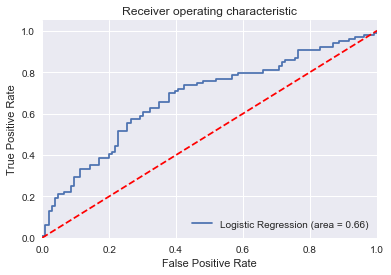

In [32]:
# reducing our sample due to in balance between y2=1 and y2=0
# reducing our sample due to in balance between y2=1 and y2=0

# for j in range(1,6):
#     for m in range(1,5):
res_hold_f1=[]
res_hold_auc=[]
x=pd.DataFrame.copy(ipo_data)
for i in range(len(x.columns)): 
    if x.iloc[:,i].dtype == float:
        outlier(x.iloc[:,i],4)             
        if x.iloc[:,i].dtype == float:   
            x.iloc[:,i]=standard(x.iloc[:,i],3)




# Create K-means model and determine euclidian distances for each data point
#train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
train=['C5x','income','C1','T3xbin','T4x','S1x','S2x','S3x','C2','T1','Other','Services','Manufacturing','C7']
X=x[train]
kmeans_model = KMeans(n_clusters=5)
distances = kmeans_model.fit_transform(X)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_


x['labels'] = labels
train.append('labels')


logreg = LogisticRegression()

X=x[train]

y=x['Y1']
rfe = RFE(logreg, 18)
rfe = rfe.fit(X,y)

logit_model=sm.Logit(x['Y1'],x[train])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#confusion_matrix = confusion_matrix(y_test, y_pred)
res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
res_hold_auc.append(logit_roc_auc)
result=logit_model.fit()
print(rfe.support_)
print(rfe.ranking_)
print(result.summary())
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

print(confusion_matrix)
print(classification_report(y_test, y_pred))


fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))

In [27]:
for j in range(1,6):
    for m in range(1,5):
        res_hold_f1=[]
        res_hold_auc=[]
        x=pd.DataFrame.copy(ipo_data)
        for i in range(len(x.columns)): 
            if x.iloc[:,i].dtype == float:
                outlier(x.iloc[:,i],j)                           
                if x.iloc[:,i].dtype == float:   
                    x.iloc[:,i]=standard(x.iloc[:,i],m)
        for k in range(2,6):
            for count in range (1,50):


                # Create K-means model and determine euclidian distances for each data point
                #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
                train=['C1','C2','C7','C5x','S1x','S2x','S3x','T1','T3xbin','T4x','T5xbin','income','Other','Services','Manufacturing']
                X=x[train]
                kmeans_model = KMeans(n_clusters=k)
                distances = kmeans_model.fit_transform(X)

                # Create scatter plot using labels from K-means model as color
                labels = kmeans_model.labels_


                x['labels'] = labels
                train.append('labels')


                logreg = LogisticRegression()

                X=x[train]

                y=x['Y1']
                rfe = RFE(logreg, 18)
                rfe = rfe.fit(X,y)

                logit_model=sm.Logit(x['Y1'],x[train])


                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                
                logreg = LogisticRegression()
                logreg.fit(X_train, y_train)
                y_pred = logreg.predict(X_test)

                kfold = model_selection.KFold(n_splits=5, random_state=7)
                modelCV = LogisticRegression()
                scoring = 'accuracy'
                results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
                logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
                #confusion_matrix = confusion_matrix(y_test, y_pred)
                res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
                res_hold_auc.append(logit_roc_auc)
            print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
            print('F1 {:.2f}; AUC {:.2f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 1 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 1; Standardise Method 1 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 1; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 2 Kmeans 2
F1 0.54; AUC 0.55 
Outlier Method 1; Standardise Method 2 Kmeans 3
F1 0.54; AUC 0.55 
Outlier Method 1; Standardise Method 2 Kmeans 4
F1 0.54; AUC 0.55 
Outlier Method 1; Standardise Method 2 Kmeans 5
F1 0.54; AUC 0.55 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 3 Kmeans 2
F1 0.63; AUC 0.63 
Outlier Method 1; Standardise Method 3 Kmeans 3
F1 0.63; AUC 0.63 
Outlier Method 1; Standardise Method 3 Kmeans 4
F1 0.63; AUC 0.63 
Outlier Method 1; Standardise Method 3 Kmeans 5
F1 0.63; AUC 0.63 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 4 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 1; Standardise Method 4 Kmeans 3
F1 0.59; AUC 0.60 
Outlier Method 1; Standardise Method 4 Kmeans 4
F1 0.60; AUC 0.60 
Outlier Method 1; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.60 
Outlier Method 2; Standardise Method 1 Kmeans 3
F1 0.60; AUC 0.60 
Outlier Method 2; Standardise Method 1 Kmeans 4
F1 0.60; AUC 0.60 
Outlier Method 2; Standardise Method 1 Kmeans 5
F1 0.60; AUC 0.60 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 2 Kmeans 2
F1 0.54; AUC 0.54 
Outlier Method 2; Standardise Method 2 Kmeans 3
F1 0.54; AUC 0.55 
Outlier Method 2; Standardise Method 2 Kmeans 4
F1 0.54; AUC 0.55 
Outlier Method 2; Standardise Method 2 Kmeans 5
F1 0.54; AUC 0.55 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 2; Standardise Method 3 Kmeans 3
F1 0.63; AUC 0.63 
Outlier Method 2; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.63 
Outlier Method 2; Standardise Method 3 Kmeans 5
F1 0.63; AUC 0.63 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 4 Kmeans 2
F1 0.60; AUC 0.60 
Outlier Method 2; Standardise Method 4 Kmeans 3
F1 0.59; AUC 0.59 
Outlier Method 2; Standardise Method 4 Kmeans 4
F1 0.60; AUC 0.60 
Outlier Method 2; Standardise Method 4 Kmeans 5
F1 0.60; AUC 0.60 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 1 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 1 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 1 Kmeans 4
F1 0.62; AUC 0.63 
Outlier Method 3; Standardise Method 1 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 2 Kmeans 2
F1 0.54; AUC 0.55 
Outlier Method 3; Standardise Method 2 Kmeans 3
F1 0.55; AUC 0.55 
Outlier Method 3; Standardise Method 2 Kmeans 4
F1 0.55; AUC 0.56 
Outlier Method 3; Standardise Method 2 Kmeans 5
F1 0.55; AUC 0.55 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 3 Kmeans 2
F1 0.64; AUC 0.64 
Outlier Method 3; Standardise Method 3 Kmeans 3
F1 0.64; AUC 0.64 
Outlier Method 3; Standardise Method 3 Kmeans 4
F1 0.64; AUC 0.64 
Outlier Method 3; Standardise Method 3 Kmeans 5
F1 0.64; AUC 0.64 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 4 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 1 Kmeans 2
F1 0.62; AUC 0.63 
Outlier Method 4; Standardise Method 1 Kmeans 3
F1 0.63; AUC 0.63 
Outlier Method 4; Standardise Method 1 Kmeans 4
F1 0.63; AUC 0.63 
Outlier Method 4; Standardise Method 1 Kmeans 5
F1 0.63; AUC 0.63 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 2 Kmeans 2
F1 0.56; AUC 0.56 
Outlier Method 4; Standardise Method 2 Kmeans 3
F1 0.56; AUC 0.56 
Outlier Method 4; Standardise Method 2 Kmeans 4
F1 0.56; AUC 0.56 
Outlier Method 4; Standardise Method 2 Kmeans 5
F1 0.56; AUC 0.56 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.65; AUC 0.65 
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.65; AUC 0.65 
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.65; AUC 0.65 
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.64; AUC 0.65 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 4 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 4
F1 0.63; AUC 0.63 
Outlier Method 4; Standardise Method 4 Kmeans 5
F1 0.62; AUC 0.63 
Outlier Method 5; Standardise Method 1 Kmeans 2
F1 0.56; AUC 0.56 
Outlier Method 5; Standardise Method 1 Kmeans 3
F1 0.56; AUC 0.56 
Outlier Method 5; Standardise Method 1 Kmeans 4
F1 0.56; AUC 0.56 
Outlier Method 5; Standardise Method 1 Kmeans 5
F1 0.56; AUC 0.57 
Outlier Method 5; Standardise Method 2 Kmeans 2
F1 0.52; AUC 0.53 
Outlier Method 5; Standardise Method 2 Kmeans 3
F1 0.53; AUC 0.53 
Outlier Method 5; Standardise Method 2 Kmeans 4
F1 0.53; AUC 0.54 
Outlier Method 5; Standardise Method 2 Kmeans 5
F1 0.53; AUC 0.54 
Outlier Method 5; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.63 
Outlier Method 5; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 5; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0

In [ ]:
print(x

In [130]:
# # reducing our sample due to in balance between y2=1 and y2=0
# for j in range(1,6):
#     for m in range(1,5):
#         res_hold_f1=[]
#         res_hold_auc=[]
#         x=pd.DataFrame.copy(ipo_data)
#         for i in range(len(x.columns)): 
#             if x.iloc[:,i].dtype == float:
#                 outlier(x.iloc[:,i],j)             
#                 if x.iloc[:,i].dtype == float:   
#                     x.iloc[:,i]=standard(x.iloc[:,i],m)
#         for k in range(2,6):
#             for count in range (1,50):


#                 # Create K-means model and determine euclidian distances for each data point
#                 #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
#                 train=['perOffered','income','C1','T3xbin','T4x','S1x','S2x','S3x','C2','T1','C6xbin','Services','Other','Manufacturing']
#                 X=x[train]
#                 kmeans_model = KMeans(n_clusters=k)
#                 distances = kmeans_model.fit_transform(X)

#                 # Create scatter plot using labels from K-means model as color
#                 labels = kmeans_model.labels_


#                 x['labels'] = labels
#                 train.append('labels')


#                 logreg = LogisticRegression()

#                 X=x[train]

#                 y=x['Y2']
#                 rfe = RFE(logreg, 18)
#                 rfe = rfe.fit(X,y)

#                 logit_model=sm.Logit(x['Y2'],x[train])


#                 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#                 oversample = pd.concat([X_train,y_train],axis=1)
#                 max_size = oversample['Y2'].value_counts().max()

#                 lst = [oversample]
#                 for class_index, group in oversample.groupby('Y2'):
#                     lst.append(group.sample(max_size-len(group), replace=True))
#                 X_train = pd.concat(lst)
#                 y_train=pd.DataFrame.copy(X_train['Y2'])
#                 del X_train['Y2']
#                 logreg = LogisticRegression()
#                 logreg.fit(X_train, y_train)
#                 y_pred = logreg.predict(X_test)

#                 kfold = model_selection.KFold(n_splits=5, random_state=7)
#                 modelCV = LogisticRegression()
#                 scoring = 'accuracy'
#                 results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
#                 logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#                 #confusion_matrix = confusion_matrix(y_test, y_pred)
#                 res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
#                 res_hold_auc.append(logit_roc_auc)
#             print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
#             print('F1 {:.2f}; AUC {:.2f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 1 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 2 Kmeans 2
F1 0.60; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 3
F1 0.60; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 4
F1 0.60; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 3 Kmeans 2
F1 0.63; AUC 0.62 
Outlier Method 1; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 4 Kmeans 2
F1 0.60; AUC 0.62 
Outlier Method 1; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 1; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.62 
Outlier Method 1; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 2; Standardise Method 1 Kmeans 3
F1 0.60; AUC 0.61 
Outlier Method 2; Standardise Method 1 Kmeans 4
F1 0.60; AUC 0.61 
Outlier Method 2; Standardise Method 1 Kmeans 5
F1 0.60; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.63 
Outlier Method 2; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 4
F1 0.58; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 5
F1 0.58; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 4 Kmeans 2
F1 0.60; AUC 0.62 
Outlier Method 2; Standardise Method 4 Kmeans 3
F1 0.60; AUC 0.62 
Outlier Method 2; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.62 
Outlier Method 2; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 1 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 1 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 1 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 1 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 2 Kmeans 2
F1 0.58; AUC 0.62 
Outlier Method 3; Standardise Method 2 Kmeans 3
F1 0.58; AUC 0.62 
Outlier Method 3; Standardise Method 2 Kmeans 4
F1 0.58; AUC 0.62 
Outlier Method 3; Standardise Method 2 Kmeans 5
F1 0.58; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 4 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 1 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 1 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 1 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 1 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 4 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 5
F1 0.62; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 2
F1 0.59; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 5
F1 0.59; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 2
F1 0.57; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 3
F1 0.57; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 4
F1 0.57; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 5
F1 0.57; AUC 0.62 
Outlier Method 5; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0

In [20]:
# res_hold_f1=[]
# for count in range(1,100):
#     x=pd.DataFrame.copy(ipo_data)
#     for i in range(len(x.columns)): 
#         if x.iloc[:,i].dtype == float:
#             outlier(x.iloc[:,i],4)             
#     for i in range(len(x.columns)):        
#         if x.iloc[:,i].dtype == float:   
#             x.iloc[:,i]=standard(x.iloc[:,i],1)


#     # Create K-means model and determine euclidian distances for each data point
#     #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
#     train=['perOffered','income','P/E','C3x','C1','T3xbin','T4x','S1x','S2x','S3x','C2','T2','T1','C6xbin','Other','Manufacturing']
#     X=x[train]
#     kmeans_model = KMeans(n_clusters=2)
#     distances = kmeans_model.fit_transform(X)

#     # Create scatter plot using labels from K-means model as color
#     labels = kmeans_model.labels_


#     x['labels'] = labels
#     train.append('labels')


#     logreg = LogisticRegression()

#     X=x[train]

#     y=x['Y2']



#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#     oversample = pd.concat([X_train,y_train],axis=1)
#     max_size = oversample['Y2'].value_counts().max()

#     lst = [oversample]
#     for class_index, group in oversample.groupby('Y2'):
#         lst.append(group.sample(max_size-len(group), replace=True))
#     X_train = pd.concat(lst)
#     y_train=pd.DataFrame.copy(X_train['Y2'])
#     del X_train['Y2']
#     from sklearn.neural_network import MLPClassifier
#     mlp = MLPClassifier(hidden_layer_sizes=(5,16),solver='lbfgs',alpha=1e-5)
#     mlp.fit(X_train,y_train)
#     predictions = mlp.predict(X_test)
#     res_hold_f1.append(precision_recall_fscore_support(y_test, predictions, average='weighted')[2])
# print(res_hold_f1)

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


[0.58914440572977167, 0.59345240461017945, 0.6042602963470467, 0.68173851924352802, 0.64013287762620152, 0.60498086995258449, 0.5685055702549674, 0.60422426792361317, 0.5492134633576552, 0.5872913992297818, 0.64696836765620769, 0.60657304754865737, 0.58992227284910204, 0.62887140702042144, 0.61730429569461642, 0.49612172589318826, 0.55864887175253919, 0.57073066007602968, 0.56774306207354175, 0.62342848992399702, 0.54873030671254297, 0.62150118970365575, 0.5658151109937235, 0.58647828166261207, 0.61851373438913315, 0.58349503935675828, 0.52071667107535102, 0.64525942350332599, 0.55827642276422762, 0.54924001413927181, 0.6162945470158866, 0.65094334752871352, 0.67317422413529659, 0.61297429620563038, 0.62374255025136283, 0.53290889759906046, 0.61483516483516487, 0.59825063078216989, 0.59812628956089675, 0.65282070377955681, 0.53890761069033399, 0.57217544621753191, 0.61462721729490022, 0.6097560975609756, 0.51392096447528823, 0.57885986867597317, 0.60939916716240339, 0.62655750924190223

In [21]:
print(np.mean(res_hold_f1))

0.597619047379


In [82]:

for j in range(1,6):
    for m in range(1,5):
        res_hold_f1=[]
        res_hold_auc=[]
        ipo_data_y2=pd.DataFrame.copy(ipo_data)

        # Subsetting the data in order to create a balanced data set between Y2 = 1 and Y2 = 0
        df_subset = ipo_data_y2.loc[ipo_data_y2['Y2'] == 1].sample(300)
        ipo_data_y2 = ipo_data_y2.drop(df_subset.index)
        x=pd.DataFrame.copy(ipo_data_y2)
        for i in range(len(x.columns)): 
            if x.iloc[:,i].dtype == float:
                outlier(x.iloc[:,i],j)             
                if x.iloc[:,i].dtype == float:   
                    x.iloc[:,i]=standard(x.iloc[:,i],m)
        for k in range(2,6):
            for count in range(1,25):

                # Create K-means model and determine euclidian distances for each data point
                #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
                train=['perOffered','income','P/E','C3x','C4','C7','C1','T3xbin','T4x','S1x','S2x','S3x','C2','T2','T1','C6xbin','Other','Manufacturing']
                X=x[train]
                kmeans_model = KMeans(n_clusters=k)
                distances = kmeans_model.fit_transform(X)

                # Create scatter plot using labels from K-means model as color
                labels = kmeans_model.labels_


                x['labels'] = labels
                train.append('labels')


                logreg = LogisticRegression()

                X=x[train]

                y=x['Y2']
                rfe = RFE(logreg, 18)
                rfe = rfe.fit(X,y)

                logit_model=sm.Logit(x['Y2'],x[train])


                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

                logreg = LogisticRegression()
                logreg.fit(X_train, y_train)
                y_pred = logreg.predict(X_test)

                kfold = model_selection.KFold(n_splits=5, random_state=7)
                modelCV = LogisticRegression()
                scoring = 'accuracy'
                results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
                logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
                #confusion_matrix = confusion_matrix(y_test, y_pred)
                res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
                res_hold_auc.append(logit_roc_auc)
            print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
            print('F1 {:.2f}; AUC {:.2f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))
                
#                 print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
#                 print('F1 {:.2f}; AUC {:.2f} '.format(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2],logit_roc_auc))
# #             if(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2]>0.61 or logit_roc_auc>0.55):
#                   print('True')
                    #result=logit_model.fit()
#                 print(rfe.support_)
#                 print(rfe.ranking_)
#                 print(result.summary())
#                 print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#                 print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

#                 print(confusion_matrix)
#                 print(classification_report(y_test, y_pred))

                
#                 fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#                 plt.figure()
#                 plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#                 plt.plot([0, 1], [0, 1],'r--')
#                 plt.xlim([0.0, 1.0])
#                 plt.ylim([0.0, 1.05])
#                 plt.xlabel('False Positive Rate')
#                 plt.ylabel('True Positive Rate')
#                 plt.title('Receiver operating characteristic')
#                 plt.legend(loc="lower right")
#                 plt.savefig('Log_ROC')
                

#                 plt.show()
#                 plt.scatter(distances[:,0], distances[:,1], c=labels)
#                 plt.title('Kmeans Clusters')
#                 plt.show()
                

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 1 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 1; Standardise Method 1 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 1; Standardise Method 1 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 1; Standardise Method 1 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 2 Kmeans 2
F1 0.65; AUC 0.65 
Outlier Method 1; Standardise Method 2 Kmeans 3
F1 0.64; AUC 0.64 
Outlier Method 1; Standardise Method 2 Kmeans 4
F1 0.64; AUC 0.64 
Outlier Method 1; Standardise Method 2 Kmeans 5
F1 0.63; AUC 0.64 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 3
F1 0.60; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 4 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 4 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 1; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 1 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 1 Kmeans 3
F1 0.61; AUC 0.62 
Outlier Method 2; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.62 
Outlier Method 2; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 2 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.62 
Outlier Method 2; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 4 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 4 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 2; Standardise Method 4 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 2; Standardise Method 4 Kmeans 5
F1 0.62; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 3; Standardise Method 1 Kmeans 3
F1 0.60; AUC 0.60 
Outlier Method 3; Standardise Method 1 Kmeans 4
F1 0.60; AUC 0.60 
Outlier Method 3; Standardise Method 1 Kmeans 5
F1 0.60; AUC 0.60 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 2 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 3; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.60 
Outlier Method 3; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.60 
Outlier Method 3; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.60 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 3 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 3; Standardise Method 3 Kmeans 3
F1 0.60; AUC 0.60 
Outlier Method 3; Standardise Method 3 Kmeans 4
F1 0.60; AUC 0.60 
Outlier Method 3; Standardise Method 3 Kmeans 5
F1 0.60; AUC 0.60 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 4 Kmeans 2
F1 0.61; AUC 0.62 
Outlier Method 3; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 1 Kmeans 2
F1 0.58; AUC 0.58 
Outlier Method 4; Standardise Method 1 Kmeans 3
F1 0.57; AUC 0.58 
Outlier Method 4; Standardise Method 1 Kmeans 4
F1 0.58; AUC 0.58 
Outlier Method 4; Standardise Method 1 Kmeans 5
F1 0.58; AUC 0.58 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 2 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 4; Standardise Method 2 Kmeans 3
F1 0.60; AUC 0.60 
Outlier Method 4; Standardise Method 2 Kmeans 4
F1 0.60; AUC 0.60 
Outlier Method 4; Standardise Method 2 Kmeans 5
F1 0.60; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.58; AUC 0.58 
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.58; AUC 0.59 
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.58; AUC 0.58 
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.58; AUC 0.59 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 4 Kmeans 2
F1 0.63; AUC 0.63 
Outlier Method 4; Standardise Method 4 Kmeans 3
F1 0.62; AUC 0.63 
Outlier Method 4; Standardise Method 4 Kmeans 4
F1 0.62; AUC 0.63 
Outlier Method 4; Standardise Method 4 Kmeans 5
F1 0.62; AUC 0.63 
Outlier Method 5; Standardise Method 1 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 5; Standardise Method 1 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 5
F1 0.62; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 5; Standardise Method 2 Kmeans 3
F1 0.60; AUC 0.61 
Outlier Method 5; Standardise Method 2 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 5; Standardise Method 2 Kmeans 5
F1 0.61; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0

In [22]:
# reducing our sample due to in balance between y2=1 and y2=0
for j in range(1,6):
    for m in range(1,5):
        res_hold_f1=[]
        res_hold_auc=[]
        x=pd.DataFrame.copy(ipo_data)
        for i in range(len(x.columns)): 
            if x.iloc[:,i].dtype == float:
                outlier(x.iloc[:,i],j)             
                if x.iloc[:,i].dtype == float:   
                    x.iloc[:,i]=standard(x.iloc[:,i],m)
        for k in range(2,6):
            for count in range (1,25):


                # Create K-means model and determine euclidian distances for each data point
                #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
                train=['perOffered','income','P/E','C3x','C4','C7','C1','T3xbin','T4x','S1x','S2x','S3x','C2','T2','T1','C6xbin','Other','Manufacturing']
                X=x[train]
                kmeans_model = KMeans(n_clusters=k)
                distances = kmeans_model.fit_transform(X)

                # Create scatter plot using labels from K-means model as color
                labels = kmeans_model.labels_


                x['labels'] = labels
                train.append('labels')


                logreg = LogisticRegression()

                X=x[train]

                y=x['Y2']
                rfe = RFE(logreg, 18)
                rfe = rfe.fit(X,y)

                logit_model=sm.Logit(x['Y2'],x[train])


                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                oversample = pd.concat([X_train,y_train],axis=1)
                max_size = oversample['Y2'].value_counts().max()

                lst = [oversample]
                for class_index, group in oversample.groupby('Y2'):
                    lst.append(group.sample(max_size-len(group), replace=True))
                X_train = pd.concat(lst)
                y_train=pd.DataFrame.copy(X_train['Y2'])
                del X_train['Y2']
                logreg = LogisticRegression()
                logreg.fit(X_train, y_train)
                y_pred = logreg.predict(X_test)

                kfold = model_selection.KFold(n_splits=5, random_state=7)
                modelCV = LogisticRegression()
                scoring = 'accuracy'
                results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
                logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
                #confusion_matrix = confusion_matrix(y_test, y_pred)
                res_hold_f1.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
                res_hold_auc.append(logit_roc_auc)
            print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
            print('F1 {:.2f}; AUC {:.2f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))
                
#                 print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
#                 print('F1 {:.2f}; AUC {:.2f} '.format(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2],logit_roc_auc))
# #             if(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2]>0.61 or logit_roc_auc>0.55):
#                   print('True')
                    #result=logit_model.fit()
#                   #result=logit_model.fit()
#                 print(rfe.support_)
#                 print(rfe.ranking_)
#                 print(result.summary())
#                 print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#                 print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

#                 print(confusion_matrix)
#                 print(classification_report(y_test, y_pred))

                
#                 fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#                 plt.figure()
#                 plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#                 plt.plot([0, 1], [0, 1],'r--')
#                 plt.xlim([0.0, 1.0])
#                 plt.ylim([0.0, 1.05])
#                 plt.xlabel('False Positive Rate')
#                 plt.ylabel('True Positive Rate')
#                 plt.title('Receiver operating characteristic')
#                 plt.legend(loc="lower right")
#                 plt.savefig('Log_ROC')
                

#                 plt.show()
#                 plt.scatter(distances[:,0], distances[:,1], c=labels)
#                 plt.title('Kmeans Clusters')
#                 plt.show()
                

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.60 
Outlier Method 1; Standardise Method 1 Kmeans 3
F1 0.60; AUC 0.60 
Outlier Method 1; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 2 Kmeans 2
F1 0.61; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 3
F1 0.60; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 4
F1 0.60; AUC 0.62 
Outlier Method 1; Standardise Method 2 Kmeans 5
F1 0.60; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 1; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 4 Kmeans 2
F1 0.62; AUC 0.62 
Outlier Method 1; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 1; Standardise Method 4 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 1 Kmeans 2
F1 0.61; AUC 0.60 
Outlier Method 2; Standardise Method 1 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 2 Kmeans 2
F1 0.60; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 2; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 3 Kmeans 2
F1 0.63; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 2; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 4 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 2; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 1 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 3; Standardise Method 1 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 3; Standardise Method 1 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 3; Standardise Method 1 Kmeans 5
F1 0.63; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.61 
Outlier Method 3; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.61 
Outlier Method 3; Standardise Method 2 Kmeans 4
F1 0.58; AUC 0.61 
Outlier Method 3; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.59 
Outlier Method 3; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.60 
Outlier Method 3; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.60 
Outlier Method 3; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 4 Kmeans 2
F1 0.60; AUC 0.60 
Outlier Method 3; Standardise Method 4 Kmeans 3
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 4 Kmeans 4
F1 0.61; AUC 0.61 
Outlier Method 3; Standardise Method 4 Kmeans 5
F1 0.61; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 1 Kmeans 2
F1 0.63; AUC 0.62 
Outlier Method 4; Standardise Method 1 Kmeans 3
F1 0.63; AUC 0.62 
Outlier Method 4; Standardise Method 1 Kmeans 4
F1 0.63; AUC 0.61 
Outlier Method 4; Standardise Method 1 Kmeans 5
F1 0.63; AUC 0.62 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 2 Kmeans 2
F1 0.59; AUC 0.61 
Outlier Method 4; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.61 
Outlier Method 4; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.62 
Outlier Method 4; Standardise Method 2 Kmeans 5
F1 0.59; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.63; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.61 
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.61 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 4 Kmeans 2
F1 0.61; AUC 0.61 
Outlier Method 4; Standardise Method 4 Kmeans 3
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 4
F1 0.62; AUC 0.62 
Outlier Method 4; Standardise Method 4 Kmeans 5
F1 0.62; AUC 0.61 
Outlier Method 5; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.61 
Outlier Method 5; Standardise Method 1 Kmeans 3
F1 0.60; AUC 0.61 
Outlier Method 5; Standardise Method 1 Kmeans 4
F1 0.60; AUC 0.62 
Outlier Method 5; Standardise Method 1 Kmeans 5
F1 0.60; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 2
F1 0.57; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 3
F1 0.57; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 4
F1 0.57; AUC 0.62 
Outlier Method 5; Standardise Method 2 Kmeans 5
F1 0.57; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 2
F1 0.62; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.61 
Outlier Method 5; Standardise Method 3 Kmeans 4
F1 0.61; AUC 0

In [60]:
# reducing our sample due to in balance between y2=1 and y2=0

for j in range(1,6):
    for m in range(1,5):
        x=pd.DataFrame.copy(ipo_data)
        for i in range(len(x.columns)): 
            if x.iloc[:,i].dtype == float:
                outlier(x.iloc[:,i],j)             
                if x.iloc[:,i].dtype == float:   
                    x.iloc[:,i]=standard(x.iloc[:,i],m)
        for k in range(2,6):



            # Create K-means model and determine euclidian distances for each data point
            #train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Othe]
            train=['perOffered','income','P/E','C3x','C1','T3xbin','T4x','S1x','S2x','S3x','C2','T2','T1','Other','Manufacturing']

            X=x[train]
            kmeans_model = KMeans(n_clusters=k, random_state=1)
            distances = kmeans_model.fit_transform(X)

            # Create scatter plot using labels from K-means model as color
            labels = kmeans_model.labels_


            x['labels'] = labels
            train.append('labels')


            logreg = LogisticRegression()
           
            X=x[train]

            y=x['Y1']
            rfe = RFE(logreg, 18)
            rfe = rfe.fit(X,y)

            logit_model=sm.Logit(x['Y1'],x[train])
            

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

            logreg = LogisticRegression()
            logreg.fit(X_train, y_train)
            y_pred = logreg.predict(X_test)

            kfold = model_selection.KFold(n_splits=5, random_state=7)
            modelCV = LogisticRegression()
            scoring = 'accuracy'
            results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
            logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
            #confusion_matrix = confusion_matrix(y_test, y_pred)
            print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(j,m,k))
            print('F1 {:.2f}; AUC {:.2f} '.format(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2],logit_roc_auc))
            if(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2]>0.61 or logit_roc_auc>0.55):
                  print('True')
                    #result=logit_model.fit()
#                 print(rfe.support_)
#                 print(rfe.ranking_)
#                 print(result.summary())
#                 print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#                 print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

#                 print(confusion_matrix)
#                 print(classification_report(y_test, y_pred))

                
#                 fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#                 plt.figure()
#                 plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#                 plt.plot([0, 1], [0, 1],'r--')
#                 plt.xlim([0.0, 1.0])
#                 plt.ylim([0.0, 1.05])
#                 plt.xlabel('False Positive Rate')
#                 plt.ylabel('True Positive Rate')
#                 plt.title('Receiver operating characteristic')
#                 plt.legend(loc="lower right")
#                 plt.savefig('Log_ROC')
                

#                 plt.show()
#                 plt.scatter(distances[:,0], distances[:,1], c=labels)
#                 plt.title('Kmeans Clusters')
#                 plt.show()


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 1 Kmeans 2
F1 0.56; AUC 0.56 
True
Outlier Method 1; Standardise Method 1 Kmeans 3
F1 0.56; AUC 0.56 
True
Outlier Method 1; Standardise Method 1 Kmeans 4
F1 0.56; AUC 0.56 
True
Outlier Method 1; Standardise Method 1 Kmeans 5
F1 0.57; AUC 0.57 
True


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std


Outlier Method 1; Standardise Method 2 Kmeans 2
F1 0.50; AUC 0.51 
Outlier Method 1; Standardise Method 2 Kmeans 3
F1 0.52; AUC 0.52 
Outlier Method 1; Standardise Method 2 Kmeans 4
F1 0.51; AUC 0.52 
Outlier Method 1; Standardise Method 2 Kmeans 5
F1 0.50; AUC 0.51 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Outlier Method 1; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.61 
True
Outlier Method 1; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.62 
True
Outlier Method 1; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.62 
True
Outlier Method 1; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.62 
True


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 4 Kmeans 2
F1 0.45; AUC 0.54 
Outlier Method 1; Standardise Method 4 Kmeans 3
F1 0.45; AUC 0.54 
Outlier Method 1; Standardise Method 4 Kmeans 4
F1 0.45; AUC 0.54 
Outlier Method 1; Standardise Method 4 Kmeans 5
F1 0.45; AUC 0.54 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 1 Kmeans 2
F1 0.55; AUC 0.56 
True
Outlier Method 2; Standardise Method 1 Kmeans 3
F1 0.56; AUC 0.57 
True
Outlier Method 2; Standardise Method 1 Kmeans 4
F1 0.56; AUC 0.56 
True
Outlier Method 2; Standardise Method 1 Kmeans 5
F1 0.58; AUC 0.58 
True


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 2 Kmeans 2
F1 0.51; AUC 0.52 
Outlier Method 2; Standardise Method 2 Kmeans 3
F1 0.52; AUC 0.52 
Outlier Method 2; Standardise Method 2 Kmeans 4
F1 0.52; AUC 0.53 
Outlier Method 2; Standardise Method 2 Kmeans 5
F1 0.49; AUC 0.51 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.62 
True
Outlier Method 2; Standardise Method 3 Kmeans 3
F1 0.61; AUC 0.61 
True
Outlier Method 2; Standardise Method 3 Kmeans 4
F1 0.62; AUC 0.62 
True
Outlier Method 2; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.61 
True


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 4 Kmeans 2
F1 0.43; AUC 0.52 
Outlier Method 2; Standardise Method 4 Kmeans 3
F1 0.43; AUC 0.52 
Outlier Method 2; Standardise Method 4 Kmeans 4
F1 0.43; AUC 0.52 
Outlier Method 2; Standardise Method 4 Kmeans 5
F1 0.43; AUC 0.52 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.60 
True
Outlier Method 3; Standardise Method 1 Kmeans 3
F1 0.62; AUC 0.62 
True
Outlier Method 3; Standardise Method 1 Kmeans 4
F1 0.58; AUC 0.59 
True
Outlier Method 3; Standardise Method 1 Kmeans 5
F1 0.61; AUC 0.61 
True


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 2 Kmeans 2
F1 0.50; AUC 0.51 
Outlier Method 3; Standardise Method 2 Kmeans 3
F1 0.51; AUC 0.51 
Outlier Method 3; Standardise Method 2 Kmeans 4
F1 0.53; AUC 0.54 
Outlier Method 3; Standardise Method 2 Kmeans 5
F1 0.54; AUC 0.54 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 3 Kmeans 2
F1 0.60; AUC 0.60 
True
Outlier Method 3; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.62 
True
Outlier Method 3; Standardise Method 3 Kmeans 4
F1 0.63; AUC 0.63 
True
Outlier Method 3; Standardise Method 3 Kmeans 5
F1 0.61; AUC 0.62 
True


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 4 Kmeans 2
F1 0.56; AUC 0.58 
True
Outlier Method 3; Standardise Method 4 Kmeans 3
F1 0.56; AUC 0.58 
True
Outlier Method 3; Standardise Method 4 Kmeans 4
F1 0.56; AUC 0.58 
True
Outlier Method 3; Standardise Method 4 Kmeans 5
F1 0.56; AUC 0.58 
True


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 1 Kmeans 2
F1 0.60; AUC 0.61 
True
Outlier Method 4; Standardise Method 1 Kmeans 3
F1 0.62; AUC 0.62 
True
Outlier Method 4; Standardise Method 1 Kmeans 4
F1 0.61; AUC 0.62 
True
Outlier Method 4; Standardise Method 1 Kmeans 5
F1 0.58; AUC 0.59 
True


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 2 Kmeans 2
F1 0.49; AUC 0.50 
Outlier Method 4; Standardise Method 2 Kmeans 3
F1 0.50; AUC 0.50 
Outlier Method 4; Standardise Method 2 Kmeans 4
F1 0.53; AUC 0.54 
Outlier Method 4; Standardise Method 2 Kmeans 5
F1 0.52; AUC 0.53 


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.61; AUC 0.62 
True
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.62; AUC 0.63 
True
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.63; AUC 0.63 
True
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.62; AUC 0.63 
True


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 4 Kmeans 2
F1 0.55; AUC 0.57 
True
Outlier Method 4; Standardise Method 4 Kmeans 3
F1 0.55; AUC 0.57 
True
Outlier Method 4; Standardise Method 4 Kmeans 4
F1 0.55; AUC 0.57 
True
Outlier Method 4; Standardise Method 4 Kmeans 5
F1 0.55; AUC 0.57 
True
Outlier Method 5; Standardise Method 1 Kmeans 2
F1 0.52; AUC 0.52 
Outlier Method 5; Standardise Method 1 Kmeans 3
F1 0.52; AUC 0.53 
Outlier Method 5; Standardise Method 1 Kmeans 4
F1 0.51; AUC 0.52 
Outlier Method 5; Standardise Method 1 Kmeans 5
F1 0.52; AUC 0.53 
Outlier Method 5; Standardise Method 2 Kmeans 2
F1 0.49; AUC 0.50 
Outlier Method 5; Standardise Method 2 Kmeans 3
F1 0.51; AUC 0.52 
Outlier Method 5; Standardise Method 2 Kmeans 4
F1 0.46; AUC 0.49 
Outlier Method 5; Standardise Method 2 Kmeans 5
F1 0.51; AUC 0.52 
Outlier Method 5; Standardise Method 3 Kmeans 2
F1 0.58; AUC 0.58 
True
Outlier Method 5; Standardise Method 3 Kmeans 3
F1 0.60; AUC 0.60 
True
Outlier Method 5; Standardise Me

C:\Users\conor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\conor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Outlier Method 5; Standardise Method 4 Kmeans 4
F1 0.36; AUC 0.50 
Outlier Method 5; Standardise Method 4 Kmeans 5
F1 0.36; AUC 0.50 


C:\Users\conor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\conor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
# reducing our sample due to in balance between y2=1 and y2=0
for j in range(1,4):
    for m in range(1,6):
        x=pd.DataFrame.copy(ipo_data)
        for i in range(len(x.columns)): 
            if x.iloc[:,i].dtype == float:
                x.iloc[:,i]=standard12(x.iloc[:,i],j)            
                if x.iloc[:,i].dtype == float:
                    outlier(x.iloc[:,i],m) 
                    
        for k in range(2,6):



            # Create K-means model and determine euclidian distances for each data point
            train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','C6x','Other']
            X=x[train]
            kmeans_model = KMeans(n_clusters=k, random_state=1)
            distances = kmeans_model.fit_transform(X)

            # Create scatter plot using labels from K-means model as color
            labels = kmeans_model.labels_


            x['labels'] = labels
            train.append('labels')


            logreg = LogisticRegression()
            #train=['C4','C6x','T4x','S2x']
            #train=['C3x','C4','T3x','T4x','S1x','S2x','C2']

            #train=['C3x','C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x','C2']
            #train=['C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x','C2','Construction','Agriculture, Forestry and Fishing','Finance, Insurance and Real Estate','Manufacturing','Mining','Services','Transportation, Communications, Electric, Gas and Sanitary service']

            X=x[train]

            y=x['Y2']
            rfe = RFE(logreg, 18)
            rfe = rfe.fit(X,y)

            logit_model=sm.Logit(x['Y2'],x[train])
            result=logit_model.fit()

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
            oversample = pd.concat([X_train,y_train],axis=1)
            max_size = oversample['Y2'].value_counts().max()

            lst = [oversample]
            for class_index, group in oversample.groupby('Y2'):
                lst.append(group.sample(max_size-len(group), replace=True))
            X_train = pd.concat(lst)
            y_train=pd.DataFrame.copy(X_train['Y2'])
            del X_train['Y2']
            logreg = LogisticRegression()
            logreg.fit(X_train, y_train)
            y_pred = logreg.predict(X_test)

            kfold = model_selection.KFold(n_splits=5, random_state=7)
            modelCV = LogisticRegression()
            scoring = 'accuracy'
            results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
            logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
            #confusion_matrix = confusion_matrix(y_test, y_pred)
            print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(m,j,k))
            print('F1 {:.2f}; AUC {:.2f} '.format(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2],logit_roc_auc))
            if(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2]>0.61 or logit_roc_auc>0.55):
                  print('True')
#                 print(rfe.support_)
#                 print(rfe.ranking_)
#                 print(result.summary())
#                 print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#                 print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

#                 print(confusion_matrix)
#                 print(classification_report(y_test, y_pred))

                
#                 fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#                 plt.figure()
#                 plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#                 plt.plot([0, 1], [0, 1],'r--')
#                 plt.xlim([0.0, 1.0])
#                 plt.ylim([0.0, 1.05])
#                 plt.xlabel('False Positive Rate')
#                 plt.ylabel('True Positive Rate')
#                 plt.title('Receiver operating characteristic')
#                 plt.legend(loc="lower right")
#                 plt.savefig('Log_ROC')
                

#                 plt.show()
#                 plt.scatter(distances[:,0], distances[:,1], c=labels)
#                 plt.title('Kmeans Clusters')
#                 plt.show()
                

C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Optimization terminated successfully.
         Current function value: 0.564180
         Iterations 6
Outlier Method 1; Standardise Method 1 Kmeans 2
F1 0.51; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.564269
         Iterations 6
Outlier Method 1; Standardise Method 1 Kmeans 3
F1 0.52; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.564231
         Iterations 6
Outlier Method 1; Standardise Method 1 Kmeans 4
F1 0.50; AUC 0.49 
Optimization terminated successfully.
         Current function value: 0.564378
         Iterations 6
Outlier Method 1; Standardise Method 1 Kmeans 5
F1 0.52; AUC 0.50 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.562506
         Iterations 6
Outlier Method 2; Standardise Method 1 Kmeans 2
F1 0.51; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.562663
         Iterations 6
Outlier Method 2; Standardise Method 1 Kmeans 3
F1 0.51; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.562649
         Iterations 6
Outlier Method 2; Standardise Method 1 Kmeans 4
F1 0.53; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.562794
         Iterations 6
Outlier Method 2; Standardise Method 1 Kmeans 5
F1 0.51; AUC 0.54 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.561318
         Iterations 6
Outlier Method 3; Standardise Method 1 Kmeans 2
F1 0.52; AUC 0.54 
Optimization terminated successfully.
         Current function value: 0.561391
         Iterations 6
Outlier Method 3; Standardise Method 1 Kmeans 3
F1 0.55; AUC 0.55 
True
Optimization terminated successfully.
         Current function value: 0.561137
         Iterations 6
Outlier Method 3; Standardise Method 1 Kmeans 4
F1 0.53; AUC 0.54 
Optimization terminated successfully.
         Current function value: 0.561390
         Iterations 6
Outlier Method 3; Standardise Method 1 Kmeans 5
F1 0.51; AUC 0.51 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Optimization terminated successfully.
         Current function value: 0.561367
         Iterations 6
Outlier Method 4; Standardise Method 1 Kmeans 2
F1 0.52; AUC 0.54 
Optimization terminated successfully.
         Current function value: 0.561433
         Iterations 6
Outlier Method 4; Standardise Method 1 Kmeans 3
F1 0.52; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.561197
         Iterations 6
Outlier Method 4; Standardise Method 1 Kmeans 4
F1 0.53; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.561433
         Iterations 6
Outlier Method 4; Standardise Method 1 Kmeans 5
F1 0.51; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.565273
         Iterations 6
Outlier Method 5; Standardise Method 1 Kmeans 2
F1 0.51; AUC 0.54 
Optimization terminated successfully.
         Current function value: 0.565261
         Iterations 6
Outlier Method 5; Standardise Method 1 Kmeans 3
F1 0.

C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Optimization terminated successfully.
         Current function value: 0.563941
         Iterations 6
Outlier Method 1; Standardise Method 2 Kmeans 2
F1 0.57; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.563941
         Iterations 6
Outlier Method 1; Standardise Method 2 Kmeans 3
F1 0.59; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.563646
         Iterations 6
Outlier Method 1; Standardise Method 2 Kmeans 4
F1 0.56; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.563938
         Iterations 6
Outlier Method 1; Standardise Method 2 Kmeans 5
F1 0.56; AUC 0.52 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.562324
         Iterations 6
Outlier Method 2; Standardise Method 2 Kmeans 2
F1 0.52; AUC 0.47 
Optimization terminated successfully.
         Current function value: 0.562343
         Iterations 6
Outlier Method 2; Standardise Method 2 Kmeans 3
F1 0.58; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.562063
         Iterations 6
Outlier Method 2; Standardise Method 2 Kmeans 4
F1 0.59; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.562345
         Iterations 6
Outlier Method 2; Standardise Method 2 Kmeans 5
F1 0.56; AUC 0.52 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.561122
         Iterations 6
Outlier Method 3; Standardise Method 2 Kmeans 2
F1 0.60; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.561103
         Iterations 6
Outlier Method 3; Standardise Method 2 Kmeans 3
F1 0.55; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.560987
         Iterations 6
Outlier Method 3; Standardise Method 2 Kmeans 4
F1 0.58; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.561055
         Iterations 6
Outlier Method 3; Standardise Method 2 Kmeans 5
F1 0.57; AUC 0.51 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Optimization terminated successfully.
         Current function value: 0.561129
         Iterations 6
Outlier Method 4; Standardise Method 2 Kmeans 2
F1 0.56; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.561107
         Iterations 6
Outlier Method 4; Standardise Method 2 Kmeans 3
F1 0.54; AUC 0.49 
Optimization terminated successfully.
         Current function value: 0.560999
         Iterations 6
Outlier Method 4; Standardise Method 2 Kmeans 4
F1 0.57; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.561071
         Iterations 6
Outlier Method 4; Standardise Method 2 Kmeans 5
F1 0.55; AUC 0.48 
Optimization terminated successfully.
         Current function value: 0.565154
         Iterations 6
Outlier Method 5; Standardise Method 2 Kmeans 2
F1 0.56; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.565151
         Iterations 6
Outlier Method 5; Standardise Method 2 Kmeans 3
F1 0.

C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Optimization terminated successfully.
         Current function value: 0.563889
         Iterations 6
Outlier Method 1; Standardise Method 3 Kmeans 2
F1 0.54; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.563838
         Iterations 6
Outlier Method 1; Standardise Method 3 Kmeans 3
F1 0.54; AUC 0.55 
Optimization terminated successfully.
         Current function value: 0.563843
         Iterations 6
Outlier Method 1; Standardise Method 3 Kmeans 4
F1 0.53; AUC 0.55 
True
Optimization terminated successfully.
         Current function value: 0.563872
         Iterations 6
Outlier Method 1; Standardise Method 3 Kmeans 5
F1 0.52; AUC 0.50 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.561633
         Iterations 6
Outlier Method 2; Standardise Method 3 Kmeans 2
F1 0.53; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.562340
         Iterations 6
Outlier Method 2; Standardise Method 3 Kmeans 3
F1 0.54; AUC 0.54 
Optimization terminated successfully.
         Current function value: 0.562088
         Iterations 6
Outlier Method 2; Standardise Method 3 Kmeans 4
F1 0.55; AUC 0.54 
Optimization terminated successfully.
         Current function value: 0.562338
         Iterations 6
Outlier Method 2; Standardise Method 3 Kmeans 5
F1 0.53; AUC 0.53 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.561098
         Iterations 6
Outlier Method 3; Standardise Method 3 Kmeans 2
F1 0.52; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.561143
         Iterations 6
Outlier Method 3; Standardise Method 3 Kmeans 3
F1 0.51; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.561127
         Iterations 6
Outlier Method 3; Standardise Method 3 Kmeans 4
F1 0.52; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.561143
         Iterations 6
Outlier Method 3; Standardise Method 3 Kmeans 5
F1 0.55; AUC 0.54 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Optimization terminated successfully.
         Current function value: 0.561128
         Iterations 6
Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.51; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.560959
         Iterations 6
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.51; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.560907
         Iterations 6
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.51; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.561137
         Iterations 6
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.52; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.565155
         Iterations 6
Outlier Method 5; Standardise Method 3 Kmeans 2
F1 0.51; AUC 0.49 
Optimization terminated successfully.
         Current function value: 0.565083
         Iterations 6
Outlier Method 5; Standardise Method 3 Kmeans 3
F1 0.

In [12]:
# reducing our sample due to in balance between y2=1 and y2=0
for j in range(1,4):
    for m in range(1,6):
        x=pd.DataFrame.copy(ipo_data)
        for i in range(len(x.columns)): 
            if x.iloc[:,i].dtype == float:
                x.iloc[:,i]=standard12(x.iloc[:,i],j)            
                if x.iloc[:,i].dtype == float:
                    outlier(x.iloc[:,i],m) 
        for k in range(2,6):



            # Create K-means model and determine euclidian distances for each data point
            train=['C3x','C1','T3xbin','T4x','T5xbin','S1x','S2x','S3x','C2','T2','T1','Other']
            X=x[train]
            kmeans_model = KMeans(n_clusters=k, random_state=1)
            distances = kmeans_model.fit_transform(X)

            # Create scatter plot using labels from K-means model as color
            labels = kmeans_model.labels_


            x['labels'] = labels
            train.append('labels')


            logreg = LogisticRegression()
            #train=['C4','C6x','T4x','S2x']
            #train=['C3x','C4','T3x','T4x','S1x','S2x','C2']

            #train=['C3x','C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x','C2']
            #train=['C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x','C2','Construction','Agriculture, Forestry and Fishing','Finance, Insurance and Real Estate','Manufacturing','Mining','Services','Transportation, Communications, Electric, Gas and Sanitary service']

            X=x[train]

            y=x['Y1']
            rfe = RFE(logreg, 18)
            rfe = rfe.fit(X,y)

            logit_model=sm.Logit(x['Y1'],x[train])
            result=logit_model.fit()

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
           
            logreg = LogisticRegression()
            logreg.fit(X_train, y_train)
            y_pred = logreg.predict(X_test)

            kfold = model_selection.KFold(n_splits=5, random_state=7)
            modelCV = LogisticRegression()
            scoring = 'accuracy'
            results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
            logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
            #confusion_matrix = confusion_matrix(y_test, y_pred)
            print('Outlier Method {}; Standardise Method {} Kmeans {}'.format(m,j,k))
            print('F1 {:.2f}; AUC {:.2f} '.format(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2],logit_roc_auc))
            if(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2]>0.61 or logit_roc_auc>0.55):
                  print('True')
#                 print(rfe.support_)
#                 print(rfe.ranking_)
#                 print(result.summary())
#                 print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#                 print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

#                 print(confusion_matrix)
#                 print(classification_report(y_test, y_pred))

                
#                 fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#                 plt.figure()
#                 plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#                 plt.plot([0, 1], [0, 1],'r--')
#                 plt.xlim([0.0, 1.0])
#                 plt.ylim([0.0, 1.05])
#                 plt.xlabel('False Positive Rate')
#                 plt.ylabel('True Positive Rate')
#                 plt.title('Receiver operating characteristic')
#                 plt.legend(loc="lower right")
#                 plt.savefig('Log_ROC')
                

C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Optimization terminated successfully.
         Current function value: 0.664723
         Iterations 5
Outlier Method 1; Standardise Method 1 Kmeans 2
F1 0.51; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.661339
         Iterations 5
Outlier Method 1; Standardise Method 1 Kmeans 3
F1 0.50; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.659805
         Iterations 5
Outlier Method 1; Standardise Method 1 Kmeans 4
F1 0.51; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.664949
         Iterations 5
Outlier Method 1; Standardise Method 1 Kmeans 5
F1 0.50; AUC 0.50 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.662652
         Iterations 5
Outlier Method 2; Standardise Method 1 Kmeans 2
F1 0.51; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.662801
         Iterations 5
Outlier Method 2; Standardise Method 1 Kmeans 3
F1 0.50; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.661494
         Iterations 5
Outlier Method 2; Standardise Method 1 Kmeans 4
F1 0.51; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.666315
         Iterations 5
Outlier Method 2; Standardise Method 1 Kmeans 5
F1 0.51; AUC 0.51 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.667626
         Iterations 5
Outlier Method 3; Standardise Method 1 Kmeans 2
F1 0.51; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.664135
         Iterations 5
Outlier Method 3; Standardise Method 1 Kmeans 3
F1 0.52; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.661774
         Iterations 5
Outlier Method 3; Standardise Method 1 Kmeans 4
F1 0.51; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.667679
         Iterations 5
Outlier Method 3; Standardise Method 1 Kmeans 5
F1 0.50; AUC 0.51 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Optimization terminated successfully.
         Current function value: 0.666792
         Iterations 5
Outlier Method 4; Standardise Method 1 Kmeans 2
F1 0.52; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.663305
         Iterations 5
Outlier Method 4; Standardise Method 1 Kmeans 3
F1 0.50; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.661065
         Iterations 5
Outlier Method 4; Standardise Method 1 Kmeans 4
F1 0.51; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.666869
         Iterations 5
Outlier Method 4; Standardise Method 1 Kmeans 5
F1 0.50; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.660196
         Iterations 6
Outlier Method 5; Standardise Method 1 Kmeans 2
F1 0.51; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.660946
         Iterations 6
Outlier Method 5; Standardise Method 1 Kmeans 3
F1 0.

C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Optimization terminated successfully.
         Current function value: 0.660902
         Iterations 6
Outlier Method 1; Standardise Method 2 Kmeans 2
F1 0.50; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.660973
         Iterations 6
Outlier Method 1; Standardise Method 2 Kmeans 3
F1 0.49; AUC 0.49 
Optimization terminated successfully.
         Current function value: 0.661746
         Iterations 6
Outlier Method 1; Standardise Method 2 Kmeans 4
F1 0.49; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.661825
         Iterations 6
Outlier Method 1; Standardise Method 2 Kmeans 5
F1 0.50; AUC 0.51 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.663890
         Iterations 6
Outlier Method 2; Standardise Method 2 Kmeans 2
F1 0.49; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.663670
         Iterations 6
Outlier Method 2; Standardise Method 2 Kmeans 3
F1 0.49; AUC 0.49 
Optimization terminated successfully.
         Current function value: 0.664685
         Iterations 6
Outlier Method 2; Standardise Method 2 Kmeans 4
F1 0.49; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.664839
         Iterations 6
Outlier Method 2; Standardise Method 2 Kmeans 5
F1 0.49; AUC 0.50 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.665235
         Iterations 6
Outlier Method 3; Standardise Method 2 Kmeans 2
F1 0.50; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.665235
         Iterations 6
Outlier Method 3; Standardise Method 2 Kmeans 3
F1 0.51; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.665661
         Iterations 6
Outlier Method 3; Standardise Method 2 Kmeans 4
F1 0.51; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.666281
         Iterations 6
Outlier Method 3; Standardise Method 2 Kmeans 5
F1 0.51; AUC 0.51 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Optimization terminated successfully.
         Current function value: 0.663947
         Iterations 6
Outlier Method 4; Standardise Method 2 Kmeans 2
F1 0.50; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.663940
         Iterations 6
Outlier Method 4; Standardise Method 2 Kmeans 3
F1 0.50; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.664968
         Iterations 6
Outlier Method 4; Standardise Method 2 Kmeans 4
F1 0.51; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.664916
         Iterations 6
Outlier Method 4; Standardise Method 2 Kmeans 5
F1 0.51; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.661066
         Iterations 6
Outlier Method 5; Standardise Method 2 Kmeans 2
F1 0.49; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.661314
         Iterations 5
Outlier Method 5; Standardise Method 2 Kmeans 3
F1 0.

C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Optimization terminated successfully.
         Current function value: 0.661577
         Iterations 5
Outlier Method 1; Standardise Method 3 Kmeans 2
F1 0.51; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.661517
         Iterations 5
Outlier Method 1; Standardise Method 3 Kmeans 3
F1 0.51; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.661854
         Iterations 5
Outlier Method 1; Standardise Method 3 Kmeans 4
F1 0.53; AUC 0.54 
Optimization terminated successfully.
         Current function value: 0.661721
         Iterations 5
Outlier Method 1; Standardise Method 3 Kmeans 5
F1 0.53; AUC 0.54 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.664803
         Iterations 5
Outlier Method 2; Standardise Method 3 Kmeans 2
F1 0.53; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.663736
         Iterations 5
Outlier Method 2; Standardise Method 3 Kmeans 3
F1 0.55; AUC 0.55 
True
Optimization terminated successfully.
         Current function value: 0.664687
         Iterations 5
Outlier Method 2; Standardise Method 3 Kmeans 4
F1 0.52; AUC 0.53 
Optimization terminated successfully.
         Current function value: 0.664854
         Iterations 5
Outlier Method 2; Standardise Method 3 Kmeans 5
F1 0.51; AUC 0.52 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.665435
         Iterations 5
Outlier Method 3; Standardise Method 3 Kmeans 2
F1 0.49; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.666487
         Iterations 5
Outlier Method 3; Standardise Method 3 Kmeans 3
F1 0.49; AUC 0.50 
Optimization terminated successfully.
         Current function value: 0.666493
         Iterations 5
Outlier Method 3; Standardise Method 3 Kmeans 4
F1 0.51; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.666234
         Iterations 5
Outlier Method 3; Standardise Method 3 Kmeans 5
F1 0.51; AUC 0.52 


C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\Model Version Control\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Optimization terminated successfully.
         Current function value: 0.664763
         Iterations 5
Outlier Method 4; Standardise Method 3 Kmeans 2
F1 0.50; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.663817
         Iterations 5
Outlier Method 4; Standardise Method 3 Kmeans 3
F1 0.53; AUC 0.54 
Optimization terminated successfully.
         Current function value: 0.664968
         Iterations 5
Outlier Method 4; Standardise Method 3 Kmeans 4
F1 0.51; AUC 0.52 
Optimization terminated successfully.
         Current function value: 0.665110
         Iterations 5
Outlier Method 4; Standardise Method 3 Kmeans 5
F1 0.54; AUC 0.55 
Optimization terminated successfully.
         Current function value: 0.661101
         Iterations 5
Outlier Method 5; Standardise Method 3 Kmeans 2
F1 0.50; AUC 0.51 
Optimization terminated successfully.
         Current function value: 0.662378
         Iterations 5
Outlier Method 5; Standardise Method 3 Kmeans 3
F1 0.